# **Project Name**    - Netflix Movies and TV Shows Clustering



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1 -** Arumugam Balasuadhakar

# **Project Summary -**

The main aim of this project is to utilize NLP techniques to analyze the Netflix Dataset containing movies and TV shows .The major objective is to categorize the content into meaningful clusters, enabling the development of an improved recommendation system. Additionally, the dataset will be thoroughly examined to reveal valuable insights and identify emerging trends in the rapidly expanding domain of streaming entertainment.
Steps followed in this project are:
1.	Importing the necessary libraries, mounting drive and storing data in variables for deriving meaningful insights.
2.	Checking for Null/Missing/Infinite values in our data. followed Binning process where respective feature(Rating) converted into miningful categories.
3.	Exploratory data analysis (EDA) was performed on various attributes and gained insightful findings that will be valuable in preventing subscriber churn.
4.	The hypothesis tests was conducted to gain deeper insights into the relationships between variables in our dataset.
5.	The process of handling the outliers, dropping unnecessary columns and creating appropriate functions are done in Feature Engineering step.
6.	The cluster was created using following attributes: director, cast, country, genre, rating and description. The values in these attributes were tokenized, preprocessed, and then vectorized using TFIDF vectorizer.
7.	By using PCA  dimensionality reduction was carried out . 
8.	Finally the  clustering was done using different algorithms, such as K-Means, Agglomerative Hierarchical Clustering, DBSCAN, ElbowCurve,  Dendogram etc.
9.	The content-based recommender system was developed using the cosine similarity matrix. This system analyzes the type of show a user has watched and generates personalized recommendations for the user, which is expected to improve user experience and reduce subscriber churn for Netflix.


# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**This dataset containing of movies and TV shows existing on Netflix as of 2019. The Flixable search engine was used to collect the dataset. In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service's number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset. Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
#Importing the neccessary packages
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.cm as cm



%matplotlib inline

# Importing Date & Time util modules
from dateutil.parser import parse

import collections as c


import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS

#for nlp
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import string
string.punctuation
nltk.download('omw-1.4')
from nltk.tokenize import TweetTokenizer
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.stem import LancasterStemmer, WordNetLemmatizer

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.decomposition import PCA

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import scipy.cluster.hierarchy as sch


import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Importing Date & Time util modules
from dateutil.parser import parse

import collections as c
!pip install xplotter --upgrade
!pip install pycountry-convert
!pip install geopy
!pip install folium
!pip install geopandas

# Xplotter
from xplotter.insights import *
from xplotter.formatter import format_spines

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 100.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.7/228.7 kB 20.8 MB/s eta 0:00:00
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681832 sha256=94acbd2c1d7eee0527916a5e7250ba971c6b6fac99c87e85fa6f403de93dc73d
  Stored in directory: /root/.cache/pip/wheels/03/57/cc/290c5252ec97a6d78d36479a3c5e5ecc76318afcb241ad9dbe
Successfully built pycountry
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking

### Dataset Loading

In [2]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset
file_path = r"/content/drive/MyDrive/csv file/Machine Learning csv files/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv"
df = pd.read_csv(file_path,encoding_errors= 'replace')


### Dataset First View

In [4]:
# Dataset First Look
df.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
print(f" The dataset contains {df.shape[0]} Rows and {df.shape[1]} columns ")

 The dataset contains 7787 Rows and 12 columns 


### Dataset Information

In [6]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
print(df.isnull().sum())

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64


In [9]:
# Percentage of null values in each category
print("Percentage of null values in each variable: ")
print("-"*50)
null_count_by_variable = round(df.isnull().sum()/len(df),4)
print(f"{null_count_by_variable*100}%")

Percentage of null values in each variable: 
--------------------------------------------------
show_id          0.00
type             0.00
title            0.00
director        30.68
cast             9.22
country          6.51
date_added       0.13
release_year     0.00
rating           0.09
duration         0.00
listed_in        0.00
description      0.00
dtype: float64%


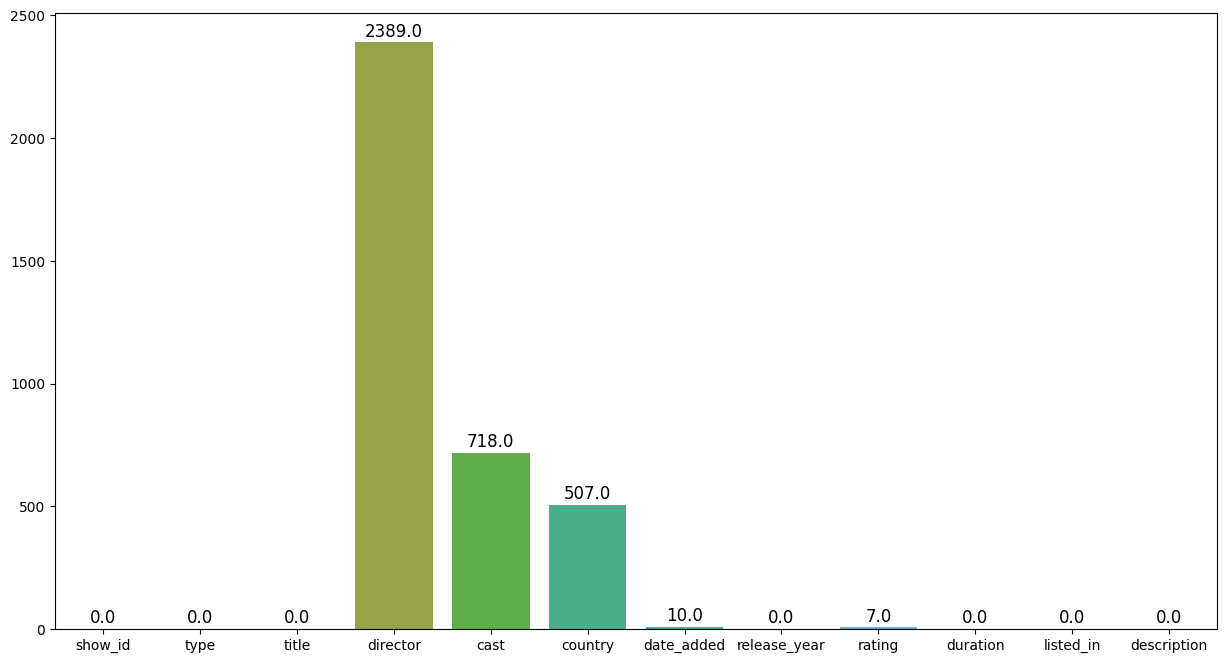

In [10]:
# Visualizing the missing values
plt.figure(figsize=(15,8))
plots= sns.barplot(x=df.columns,y=df.isna().sum())
for bar in plots.patches:
      plots.annotate(bar.get_height(),
                     (bar.get_x() + bar.get_width() / 2,
                      bar.get_height()), ha='center', va='center',
                     size=12, xytext=(0, 8),
                     textcoords='offset points')
plt.show()


### What did you know about your dataset?


*   The Dataset is having 7787 rows and 12 columns.
*   Director column has the 30 %  null values , cast and country columns with 9.2 and 6.7 % of null values respectively.
*   There are no duplicate values present in the dataset.
*   All columns have data of object type except release_year which is integer type, which means we have only one numerical column in the dataset.


## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [12]:
# Dataset Describe
df.describe(include='all')

show_id   type title                director                cast  \
count     7787   7787  7787                    5398                7069   
unique    7787      2  7787                    4049                6831   
top         s1  Movie    3%  Raúl Campos, Jan Suter  David Attenborough   
freq         1   5377     1                      18                  18   
mean       NaN    NaN   NaN                     NaN                 NaN   
std        NaN    NaN   NaN                     NaN                 NaN   
min        NaN    NaN   NaN                     NaN                 NaN   
25%        NaN    NaN   NaN                     NaN                 NaN   
50%        NaN    NaN   NaN                     NaN                 NaN   
75%        NaN    NaN   NaN                     NaN                 NaN   
max        NaN    NaN   NaN                     NaN                 NaN   

              country       date_added  release_year rating  duration  \
count            7280             7777   7787.000000   7780      7787   
unique            681             1565           NaN     14       216   
top     United States  January 1, 2020           NaN  TV-MA  1 Season   
freq             2555              118           NaN   2863      1608   
mean              NaN              NaN   2013.932580    NaN       NaN   
std               NaN              NaN      8.757395    NaN       NaN   
min               NaN              NaN   1925.000000    NaN       NaN   
25%               NaN              NaN   2013.000000    NaN       NaN   
50%               NaN              NaN   2017.000000    NaN       NaN   
75%               NaN              NaN   2018.000000    NaN       NaN   
max               NaN              NaN   2021.000000    NaN       NaN   

            listed_in                                        description  
count            7787                                               7787  
unique            492                                               7769  
top     Documentaries  Multiple women report their husbands as missin...  
freq              334                                                  3  
mean              NaN                                                NaN  
std               NaN                                                NaN  
min               NaN                                                NaN  
25%               NaN                                                NaN  
50%               NaN                                                NaN  
75%               NaN                                                NaN  
max               NaN                                                NaN

### Variables Description 

The variable description of the Netflix Movies and TV Shows Clustering Dataset is as follows:

1. **show_id:** Unique identifier for each movie/show.

2. **type:** Indicates whether the entry is a movie or a TV show.

3. **title:** Name of the movie or TV show.

4. **director:** Name of the director(s) of the movie or TV show.

5. **cast:** Names of the actors and actresses featured in the movie or TV show.

6. **country:** Country or countries where the movie or TV show was produced.

7. **date_added:** Date when the movie or TV show was added to Netflix.

8. **release_year:** Year when the movie or TV show was released.

9. **rating:** TV rating or movie rating of the movie or TV show.

10. **duration:** Length of the movie or TV show in minutes or seasons.

11. **listed_in:** Categories or genres of the movie or TV show.

12. **description:** Brief synopsis or summary of the movie or TV show.

### Check Unique Values for each variable.

In [13]:
# Check Unique Values for each variable.
print(f"The number of unique values in: ")
print("-"*32)
for i in df.columns:
  print(f" {i} : {df[i].nunique()}")

The number of unique values in: 
--------------------------------
 show_id : 7787
 type : 2
 title : 7787
 director : 4049
 cast : 6831
 country : 681
 date_added : 1565
 release_year : 73
 rating : 14
 duration : 216
 listed_in : 492
 description : 7769


## 3. ***Data Wrangling***

### Data Wrangling Code

In [14]:
# Write your code to make your dataset analysis ready.
def all_columns_info(df):
     mis_val = df.isna().sum()
     mis_val_percent = 100 * mis_val / len(df)
     unique_val = df.nunique()
     aci_table = pd.concat([mis_val, mis_val_percent, unique_val], axis=1)
     aci_table = aci_table.rename(columns={0: "No of Null Values", 1: "% of null values", 2: "No of unique values"})
     aci_table["Data Type"] = df.dtypes
     aci_table = aci_table.sort_values("% of null values", ascending=False).round(1)
     print(f"Selected DataFrame has {df.shape[1]} columns and {df.shape[0]} rows.")
     return aci_table

In [15]:
# Applying the function all columns information
all_columns_info(df)

Selected DataFrame has 12 columns and 7787 rows.


No of Null Values  % of null values  No of unique values  \
director                   2389              30.7                 4049   
cast                        718               9.2                 6831   
country                     507               6.5                  681   
date_added                   10               0.1                 1565   
rating                        7               0.1                   14   
show_id                       0               0.0                 7787   
type                          0               0.0                    2   
title                         0               0.0                 7787   
release_year                  0               0.0                   73   
duration                      0               0.0                  216   
listed_in                     0               0.0                  492   
description                   0               0.0                 7769   

             Data Type  
director        object  
cast            object  
country         object  
date_added      object  
rating          object  
show_id         object  
type            object  
title           object  
release_year     int64  
duration        object  
listed_in       object  
description     object

In [16]:
# check for unique ratings
df['rating'].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y', nan,
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

### Binning of Rating attribute

In rating columns we have different categories these are content rating classifications that are commonly used in the United States and other countries to indicate the appropriateness of media content for different age groups. Let's understand each of them and binnig them accordingly:

**TV-MA:** This rating is used for mature audiences only, and it may contain strong language, violence, nudity, and sexual content.

**R:** This rating is used for movies that are intended for audiences 17 and older. It may contain graphic violence, strong language, drug use, and sexual content.

**PG-13:** This rating is used for movies that may not be suitable for children under 13. It may contain violence, mild to moderate language, and suggestive content.

**TV-14:** This rating is used for TV shows that may not be suitable for children under 14. It may contain violence, strong language, sexual situations, and suggestive dialogue.

**TV-PG:** This rating is used for TV shows that may not be suitable for children under 8. It may contain mild violence, language, and suggestive content.

**NR:** This stands for "Not Rated." It means that the content has not been rated by a rating board, and it may contain material that is not suitable for all audiences.

**TV-G:** This rating is used for TV shows that are suitable for all ages. It may contain some mild violence, language, and suggestive content.

**TV-Y:** This rating is used for children's TV shows that are suitable for all ages. It is intended to be appropriate for preschool children.

**TV-Y7:** This rating is used for children's TV shows that may not be suitable for children under 7. It may contain mild violence and scary content.

**PG:** This rating is used for movies that may not be suitable for children under 10. It may contain mild language, some violence, and some suggestive content.

**G:** This rating is used for movies that are suitable for general audiences. It may contain some mild language and some violence.

**NC-17:** This rating is used for movies that are intended for adults only. It may contain explicit sexual content, violence, and language.

**TV-Y7-FV:** This rating is used for children's TV shows that may not be suitable for children under 7. It may contain fantasy violence.

**UR:** This stands for "Unrated." It means that the content has not been rated by a rating board, and it may contain material that is not suitable for all audiences.

Let's not complicate it and create bins as following:

* Adult Content: TV-MA, NC-17, R
* Children Content: TV-PG, PG, TV-G, G
* Teen Content: PG-13, TV-14
* Family-friendly Content: TV-Y, TV-Y7, TV-Y7-FV
* Not Rated: NR, UR


In [17]:
# Binning the values in the rating column
rating_map = {'TV-MA':'Adult Content',
              'R':'Adult Content',
              'PG-13':'Teen Content',
              'TV-14':'Teen Content',
              'TV-PG':'Children Content',
              'NR':'Not Rated',
              'TV-G':'Children Content',
              'TV-Y':'Family-friendly Content',
              'TV-Y7':'Family-friendly Content',
              'PG':'Children Content',
              'G':'Children Content',
              'NC-17':'Adult Content',
              'TV-Y7-FV':'Family-friendly Content',
              'UR':'Not Rated'}

df['rating'].replace(rating_map, inplace = True)

In [18]:
# Create new features to store date, day, month and year seperately :
# First convert date_added to date time format.
df["date_added"] = pd.to_datetime(df['date_added'])
  
# Create day column 
df['day_added'] = df['date_added'].dt.day   

# Create year column         
df['year_added'] = df['date_added'].dt.year

# Create month column
df['month_added'] = df['date_added'].dt.month 

# Typecasting duration into integer by removing 'min' and 'season' from the end
df['duration']= df['duration'].apply(lambda x: int(x.split()[0]))

In [19]:
# Checking the dataset after binning
df.head(1)

show_id     type title director  \
0      s1  TV Show    3%      NaN   

                                                cast country date_added  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...  Brazil 2020-08-14   

   release_year         rating  duration  \
0          2020  Adult Content         4   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   

                                         description  day_added  year_added  \
0  In a future where the elite inhabit an island ...       14.0      2020.0   

   month_added  
0          8.0

In [20]:
# changing the dtype to string
df['type']= df['type'].astype('string')
df['title']= df['title'].astype('string')
df['director']= df['director'].astype('string')
df['cast']= df['cast'].astype('string')
df['country']= df['country'].astype('string')
df['rating']= df['rating'].astype('string')
df['listed_in']= df['listed_in'].astype('string')
df['description']= df['description'].astype('string')

In [21]:
# Splitting datasets for movies and tv show
df_movies= df[df['type']== 'Movie']
df_tvshows= df[df['type']== 'TV Show']

In [22]:
# shape of new dataframes
print(f'shape of movies is : ',df_movies.shape)
print(f'shape of TV shows is : ',df_tvshows.shape)

shape of movies is :  (5377, 15)
shape of TV shows is :  (2410, 15)


In [23]:
# Checking the new spitted dataset
df_tvshows.head(1)

show_id     type title director  \
0      s1  TV Show    3%     <NA>   

                                                cast country date_added  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...  Brazil 2020-08-14   

   release_year         rating  duration  \
0          2020  Adult Content         4   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   

                                         description  day_added  year_added  \
0  In a future where the elite inhabit an island ...       14.0      2020.0   

   month_added  
0          8.0

In [24]:
# Checking the new spitted dataset
df_movies.head(1)

show_id   type title           director  \
1      s2  Movie  7:19  Jorge Michel Grau   

                                                cast country date_added  \
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...  Mexico 2016-12-23   

   release_year         rating  duration                     listed_in  \
1          2016  Adult Content        93  Dramas, International Movies   

                                         description  day_added  year_added  \
1  After a devastating earthquake hits Mexico Cit...       23.0      2016.0   

   month_added  
1         12.0

In [25]:
# checking the datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7787 non-null   object        
 1   type          7787 non-null   string        
 2   title         7787 non-null   string        
 3   director      5398 non-null   string        
 4   cast          7069 non-null   string        
 5   country       7280 non-null   string        
 6   date_added    7777 non-null   datetime64[ns]
 7   release_year  7787 non-null   int64         
 8   rating        7780 non-null   string        
 9   duration      7787 non-null   int64         
 10  listed_in     7787 non-null   string        
 11  description   7787 non-null   string        
 12  day_added     7777 non-null   float64       
 13  year_added    7777 non-null   float64       
 14  month_added   7777 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int6

### What all manipulations have you done and insights you found?

1.	The function was created which provides null values along with percentage of null count, unique values and datatype of each features.
2.	The 'rating' column contains various coded categories, following 5 bins were created for all categories.
*   Adult: TV-MA, NC-17
*   Restricted: R, UR
*   Teen: PG-13, TV-14
*   All Ages: TV-G, TV-Y, TV-Y7, TV-Y7-FV, PG, G, TV-PG
*   Not Rated: NR
3.	We have typecasted the following features: 'duration' into integer (Removing min and seasons from the values). 'date_added' to datetime (Into the required format). 
4.	The following features were  extracted :

*   'date' from 'date_added'.
*   'month' from 'date_added'.
*   'year' from 'date_added'.
4.	The datatypes were converted  to some Suitable columns from object type to string format to make the data processing easier.
5.	The dataset was splitted  into two dataframe one is 'df_movies' that contains only Movies and the other is 'df_tvshows' that contains only TV Shows for  further analysis.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

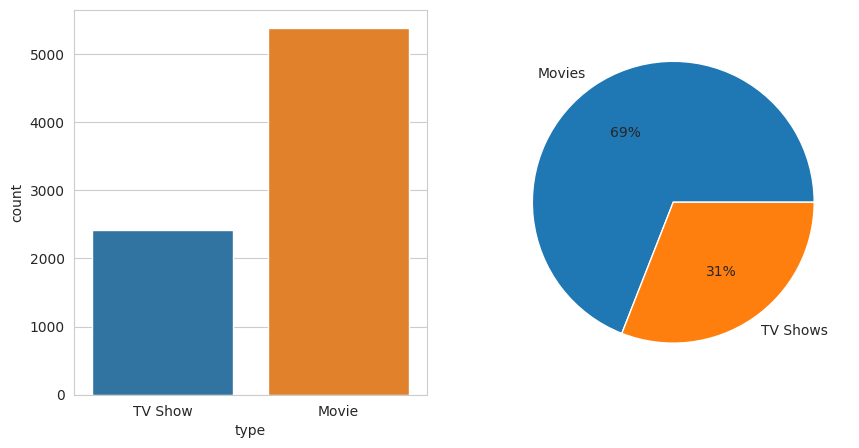

In [26]:
# Chart - 1 visualization code of number of Movies and TV Show 
sns.set_style("whitegrid")
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(10, 5))
sns.countplot(x=df['type'],ax=ax[0])
#Pie Chart 
labels = 'Movies' , 'TV Shows'
ax[1].pie(df['type'].value_counts(), labels=labels, autopct='%0.0f%%')
plt.show()

##### 1. Why did you pick the specific chart?

To identify the number of movies and tv shows available.

##### 2. What is/are the insight(s) found from the chart?

Netflix contains 69% movies and 31% TV shows.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

TV shows are less compared to movies. They can improve the TV shows.

#### Chart - 2

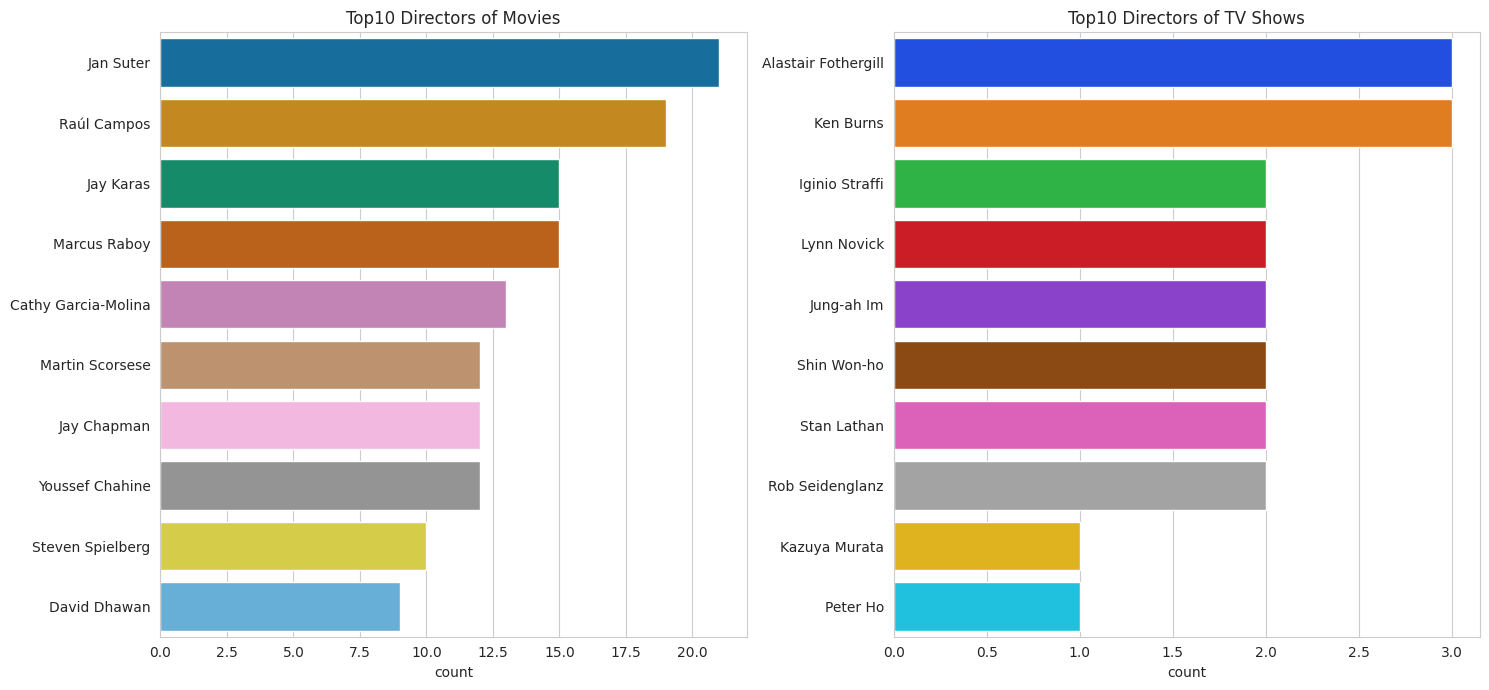

In [27]:
# Chart - 2 visualization code of Top 10 directors
# #Analysing top10 directors of the movies
figure, ax= plt.subplots(nrows=1, ncols=2, figsize=(15,7))
filtered_directors_movies = df_movies[df_movies.director != 'No Director'].set_index('title').director.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
sns.countplot(y=filtered_directors_movies,data=df_movies,order=filtered_directors_movies.value_counts().index[0:10],  palette='colorblind', ax=ax[0])
ax[0].set_title('Top10 Directors of Movies')
# #Analysing top10 directors of TVSHOWS
filtered_directors_tvshows = df_tvshows[df_tvshows.director != 'No Director'].set_index('title').director.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
sns.countplot(y=filtered_directors_tvshows,data=df_tvshows,order=filtered_directors_tvshows.value_counts().index[0:10], palette='bright', ax=ax[1])
ax[1].set_title('Top10 Directors of TV Shows')

plt.tight_layout()

##### 1. Why did you pick the specific chart?

To check the top 10 directors in movies and tv shows.

##### 2. What is/are the insight(s) found from the chart?

Top 10 trending directors of movies and TV shows have been identified.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

If any new movies and TV shows launching from this top 10 directors Netflix can give preferences.

#### Chart - 3

Text(0.5, 1.0, 'Monthwise added TV shows and Movies')

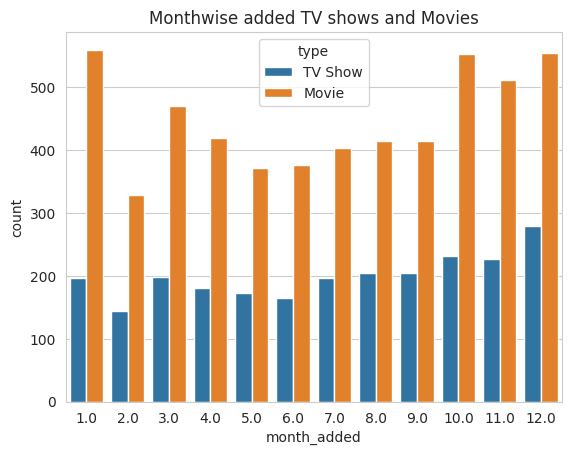

In [28]:
# Chart - 3 visualization of movies and Tv shows month wise
sns.countplot(x='month_added',hue='type',data=df)
plt.title('Monthwise added TV shows and Movies')

##### 1. Why did you pick the specific chart?

To find adding of movies and TV shows in monthwise. 

##### 2. What is/are the insight(s) found from the chart?

The adding of movies and TV shows are more in 10th and 12th months and very low in 2nd month.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The adding of movies and TV shows 2nd month is very less.The reason need to be find.

#### Chart - 4

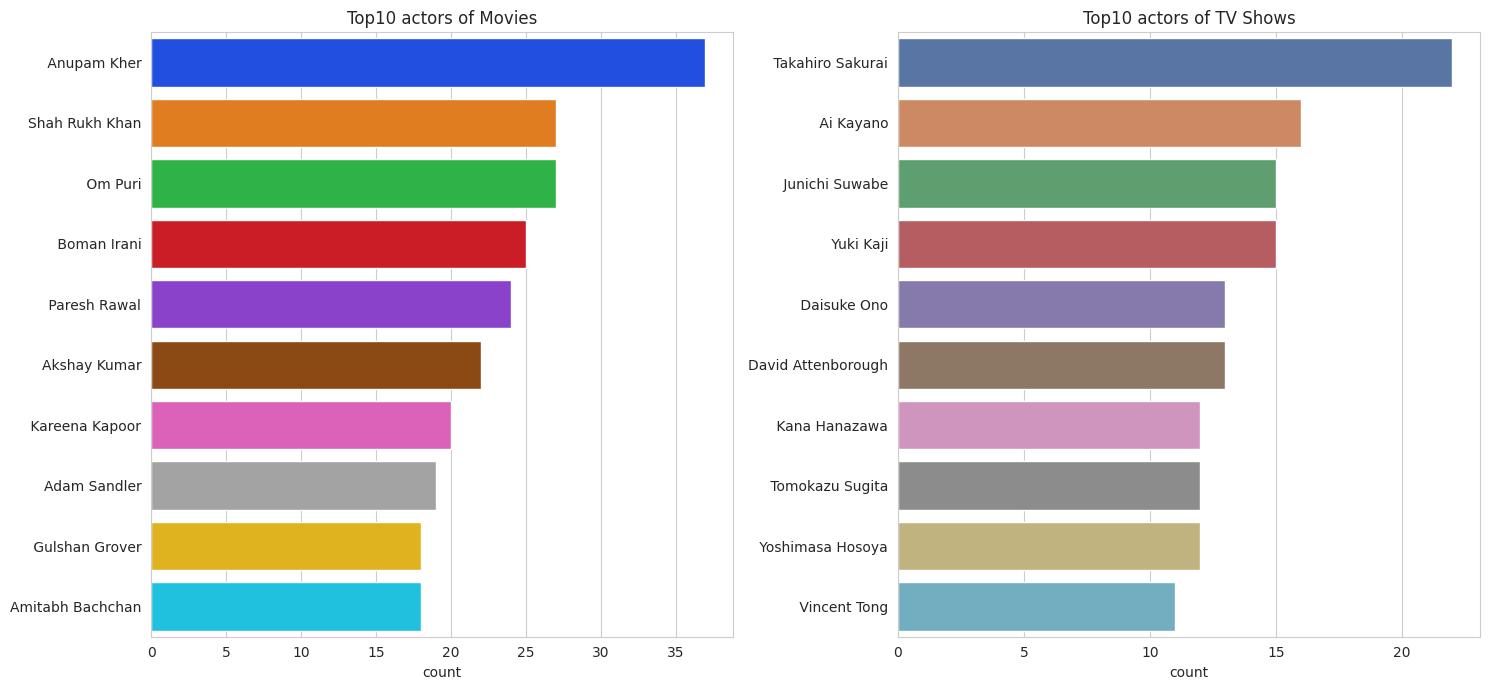

In [29]:
# Chart - 4 visualization code of top ten actors 
# Analysing top10 actors of the movies
figure, ax= plt.subplots(nrows=1, ncols=2, figsize=(15,7))
filtered_cast_movies = df_movies[df_movies.cast != 'No Cast'].set_index('title').cast.str.split(',',expand=True).stack().reset_index(level=1, drop=True)
sns.countplot(y=filtered_cast_movies,data=df_movies,order=filtered_cast_movies.value_counts().index[0:10],  palette='bright', ax=ax[0])
ax[0].set_title('Top10 actors of Movies')
# Analysing top10 actors of TVSHOWS
filtered_cast_tvshows = df_tvshows[df_tvshows.cast != 'No Cast'].set_index('title').cast.str.split(',',expand=True).stack().reset_index(level=1, drop=True)
sns.countplot(y=filtered_cast_tvshows,data=df_tvshows,order=filtered_cast_tvshows.value_counts().index[0:10], palette='deep', ax=ax[1])
ax[1].set_title('Top10 actors of TV Shows')

plt.tight_layout()

##### 1. Why did you pick the specific chart?

To find top 10 actors in movies and TV shows.

##### 2. What is/are the insight(s) found from the chart?

 Top 10 actors in movies and TV shows have been identified.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Netflix can give the preference of top 10 actors movies and TV shows when it release.

#### Chart - 5

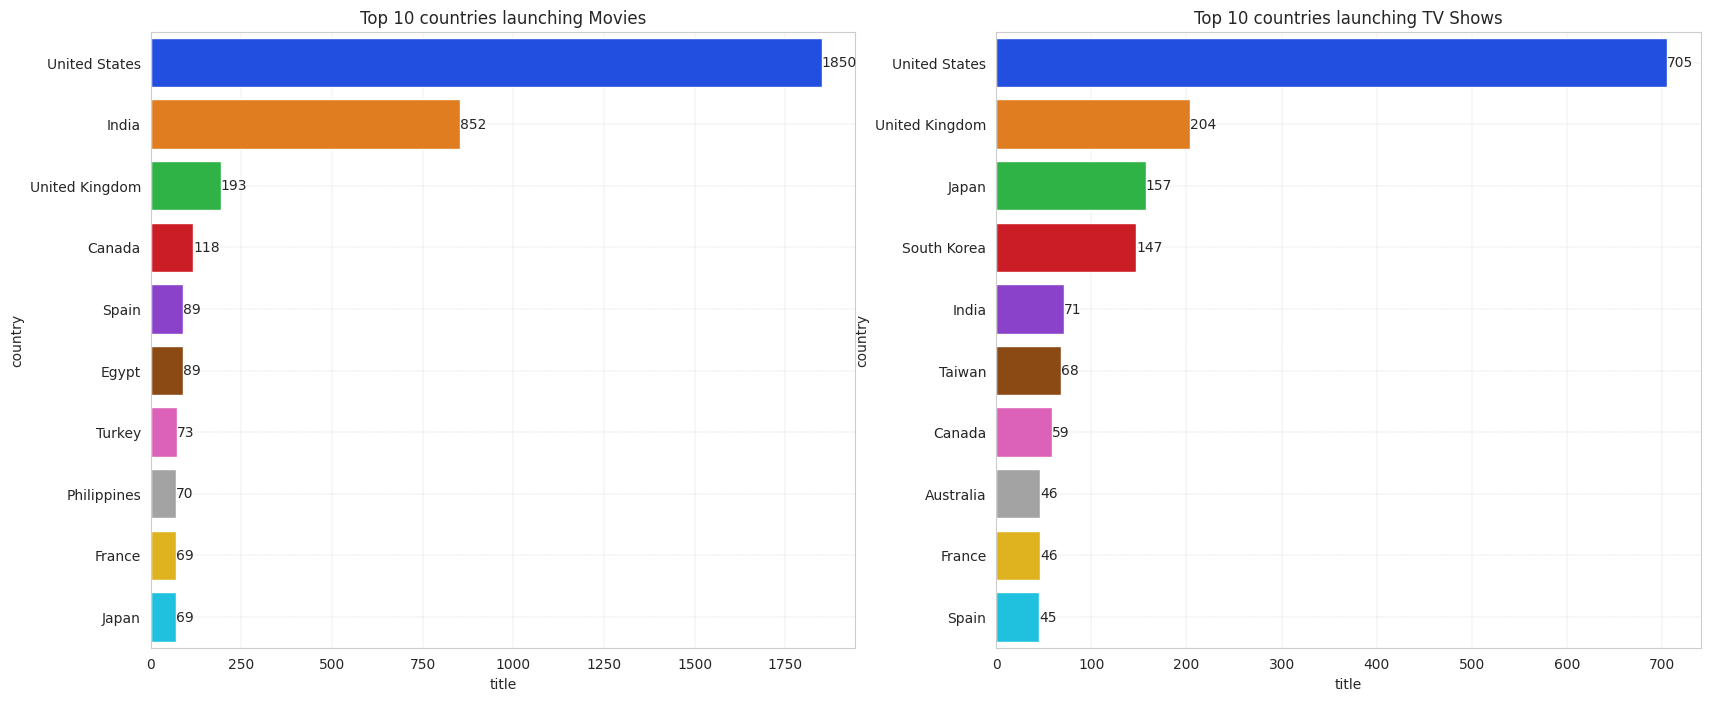

In [30]:
# Chart - 5 visualization code top 10 countries launching movies
plt.figure(figsize=(20,8))
for i,j,k in ((df_movies, 'Movies',0),(df_tvshows, 'TV Shows',1)):
  plt.subplot(1,2,k+1)
  df_country = i.groupby(['country']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)[:10]
  plots= sns.barplot(y = "country",x = 'title', data = df_country, palette='bright')
  plt.title(f'Top 10 countries launching {j}')
  plt.grid(linestyle='--', linewidth=0.3)
  plots.bar_label(plots.containers[0])
plt.show()

##### 1. Why did you pick the specific chart?

To identify top 10 countries tolaunch movies and TV shows.

##### 2. What is/are the insight(s) found from the chart?

USA and India are in top two places for launching the movies.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The countries like france and japan are in very less launching movies.Netflix can collaborate with production company to increase the launching.

#### Chart - 6

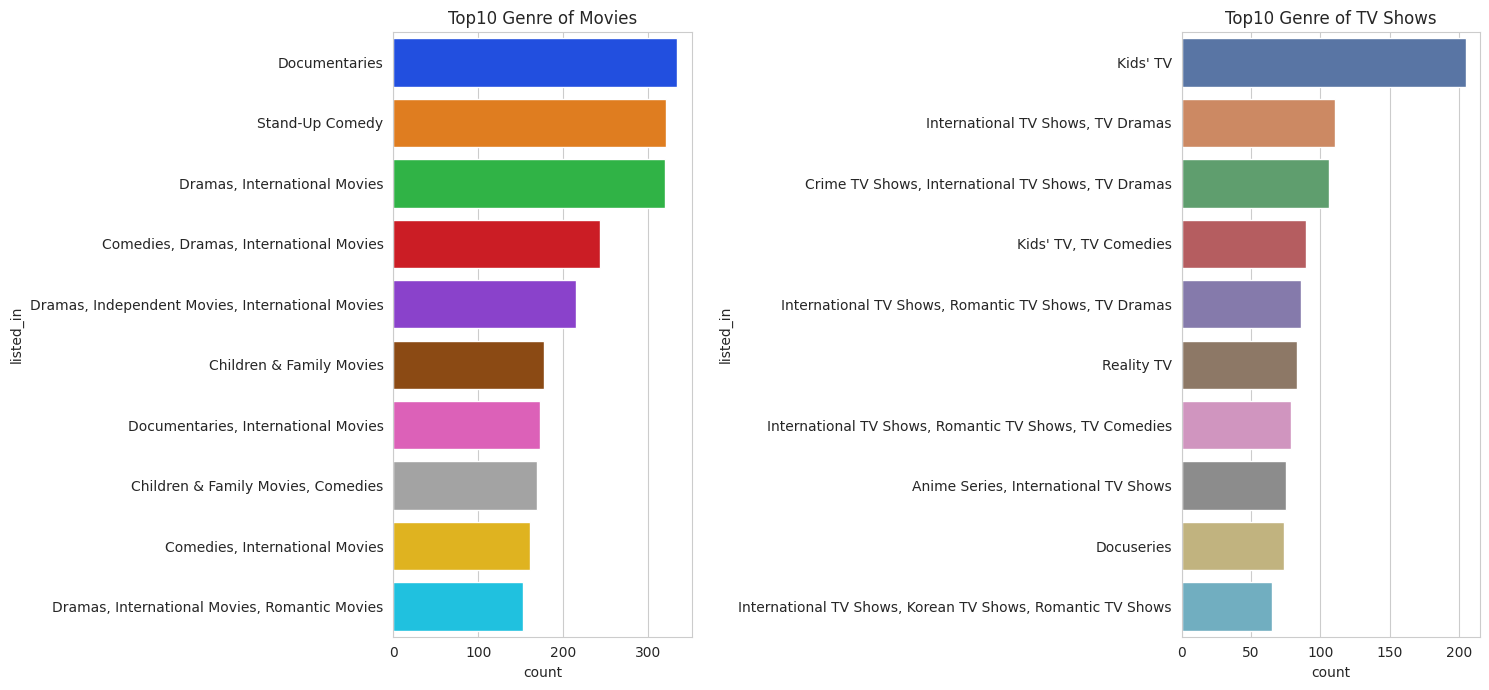

In [31]:
# Chart - 6 visualization code top10 genre of the movies and TV shows
# #Analysing top10 genre of the movies
figure, ax= plt.subplots(nrows=1, ncols=2, figsize=(15,7))
sns.countplot(y=df_movies['listed_in'],data=df_movies,order=df_movies['listed_in'].value_counts().index[0:10],  palette='bright', ax=ax[0])
ax[0].set_title('Top10 Genre of Movies')
# #Analysing top10 genres of TVSHOWS
sns.countplot(y=df_tvshows['listed_in'],data=df_tvshows,order=df_tvshows['listed_in'].value_counts().index[0:10], palette='deep', ax=ax[1])
ax[1].set_title('Top10 Genre of TV Shows')

plt.tight_layout()

##### 1. Why did you pick the specific chart?

To identify top10 genre of the movies and TV shows.

##### 2. What is/are the insight(s) found from the chart?

Documentary type movies and Kids Tv shows are more.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Netflix can add more advertisements on Documentary type movies and Kids Tv shows.

#### Chart - 7

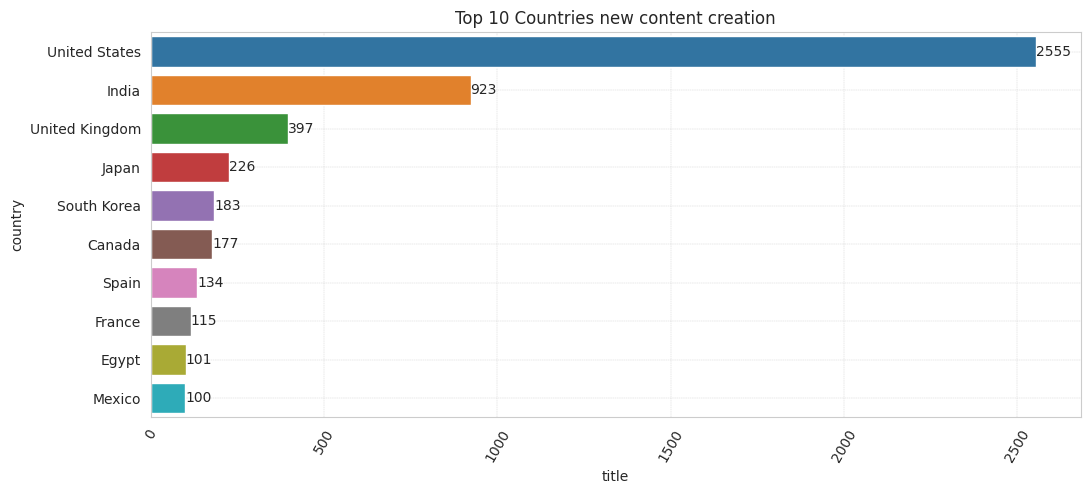

In [32]:
# Chart - 7 visualization code Top 10 Countries new content creation
filtered_countries = df.groupby(['country']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.figure(figsize=(12,5))
plots= sns.barplot(y = "country",x = 'title', data = filtered_countries)
plt.xticks(rotation = 60)
plt.title('Top 10 Countries new content creation')
plt.grid(linestyle='--', linewidth=0.3)
plots.bar_label(plots.containers[0])
plt.show()

##### 1. Why did you pick the specific chart?

To identify Top 10 Countries for creating the new content.

##### 2. What is/are the insight(s) found from the chart?

USA and India are the top 2 countries for creating new contents.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Netflix can add the movies from USA and India because they are top 2 for creating new contents.

#### Chart - 8

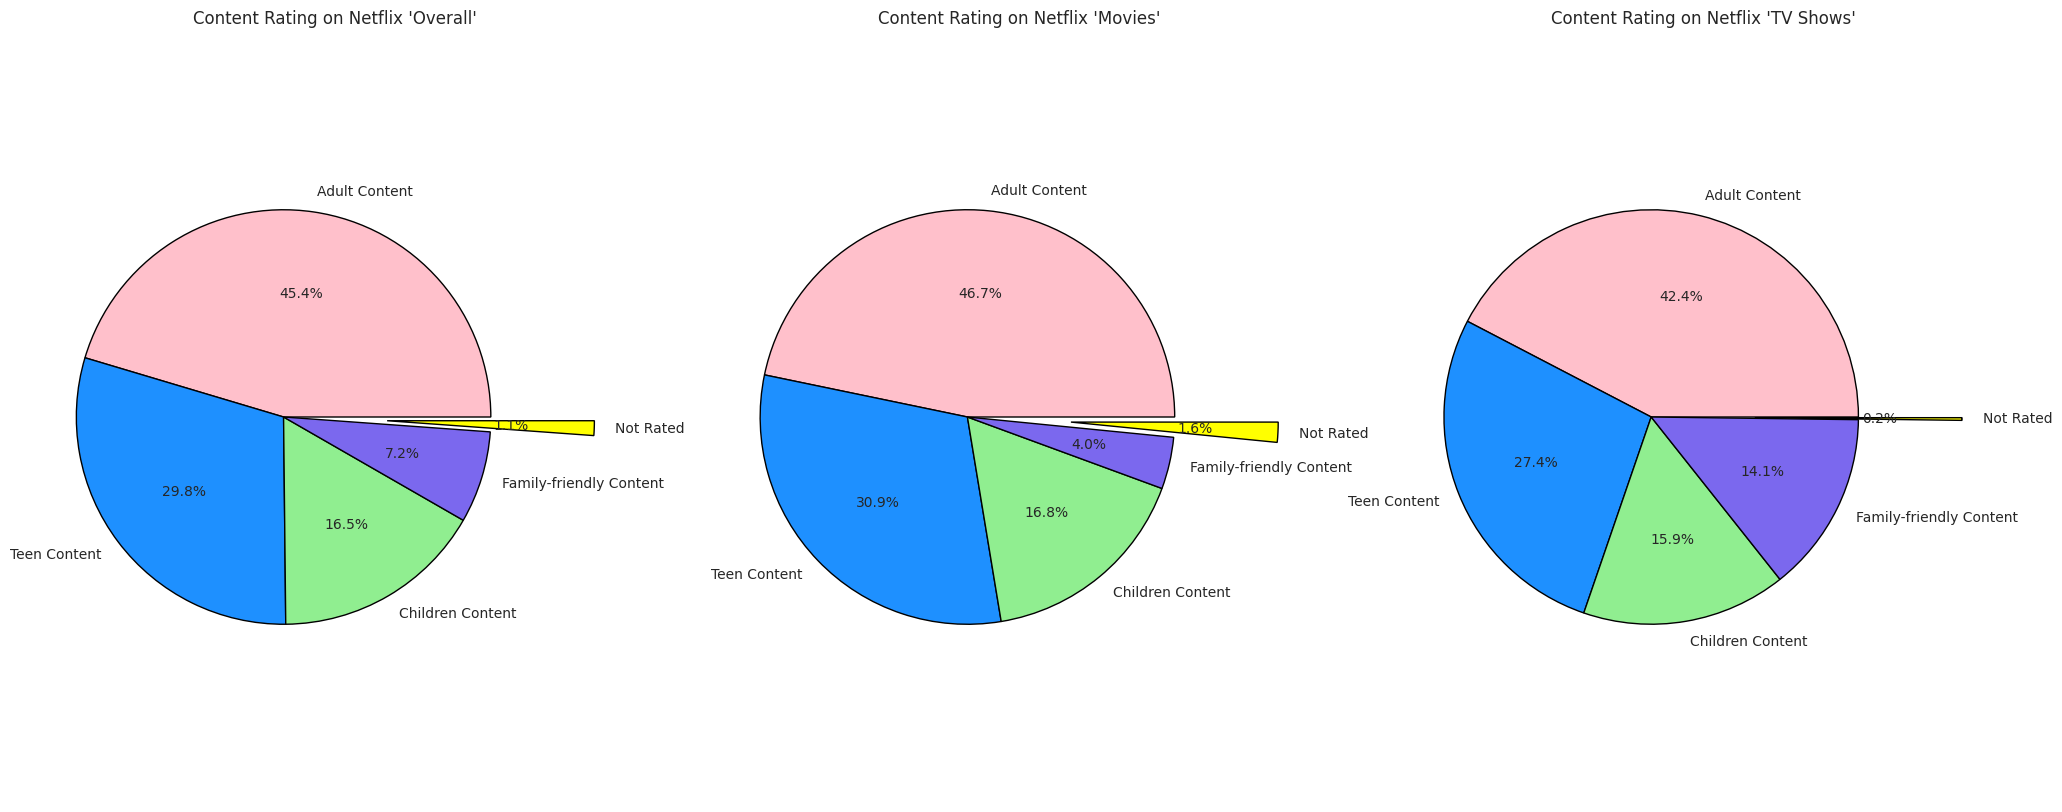

In [33]:
# Chart - 8 visualization code of distribution of content ra
plt.figure(figsize=(25,10))
for i,j,k in ((df, 'Overall',0),(df_movies, 'Movies',1),(df_tvshows, 'TV Shows',2)):
  plt.subplot(1,3,k+1)
  count= i['rating'].value_counts()
  plt.pie(count, labels=count.index,explode=(0,0,0,0,0.5),colors=['pink','dodgerblue','lightgreen','mediumslateblue','yellow'],
          autopct='%1.1f%%', labeldistance=1.1,wedgeprops={"edgecolor" : "black",'linewidth': 1,'antialiased': True})
  plt.title(f"Content Rating on Netflix '{j}'")
  plt.axis('equal')
plt.show()

##### 1. Why did you pick the specific chart?

To visulize the rating of each contents.

##### 2. What is/are the insight(s) found from the chart?

Adult content movies and TV shows have the more ratings.Family and friends contents less ratings.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Netflix can increase the adverisments of adult contents movies.They can identify the reasons for less ratings in Family-frients contents movies.

#### Chart - 9

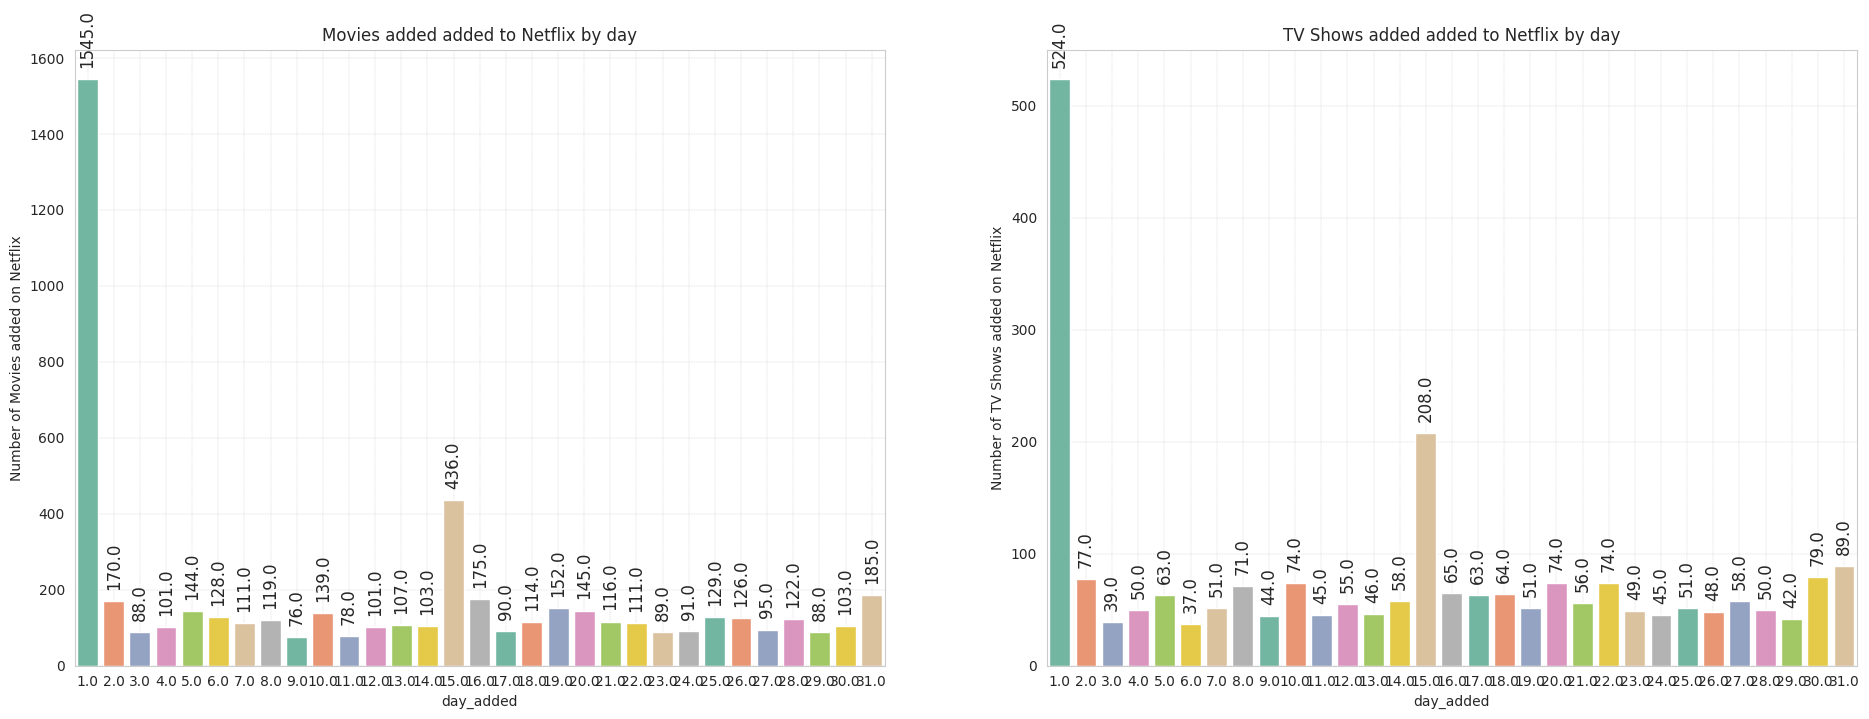

In [34]:
# Chart - 9 visualization code of movie and TV shows added in daywise
plt.figure(figsize=(23,8))
for i,j,k in ((df_movies, 'Movies',0),(df_tvshows, 'TV Shows',1)):
  plt.subplot(1,2,k+1)
  df_day = i.groupby(['day_added']).agg({'title':'nunique'}).reset_index().sort_values(by=['day_added'],ascending=False)
  plots= sns.barplot(x = 'day_added',y='title', data = df_day, palette="Set2")
  plt.title(f'{j} added added to Netflix by day')
  plt.ylabel(f"Number of {j} added on Netflix")
  plt.grid(linestyle='--', linewidth=0.3)
  for bar in plots.patches:
     plots.annotate(bar.get_height(),
                    (bar.get_x() + bar.get_width() / 2,
                     bar.get_height()), ha='center', va='bottom',
                    size=12, xytext=(0, 8),
                    textcoords='offset points', rotation=90)

##### 1. Why did you pick the specific chart?

To visualize movies and TV shows added in daywise.

##### 2. What is/are the insight(s) found from the chart?

Most of the movies and Tv shows added in first day of the month and middle of the months.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Some movies and Tv hows added later in the months.Netflix can identify the reasons and rectify it.

#### Chart - 10

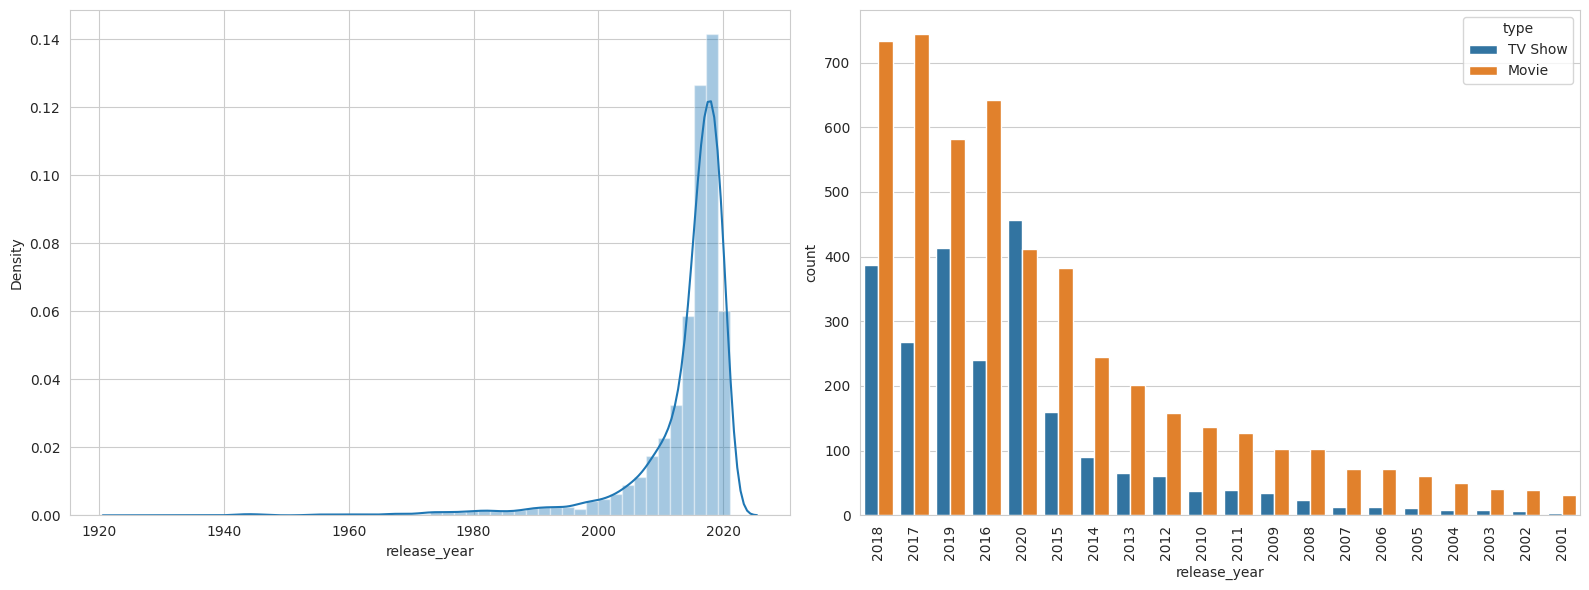

In [35]:
# Chart - 10 visualization code of movies and Tv shows releasing years
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(16, 6)) 
sns.distplot(df['release_year'],ax=ax[0])
sns.countplot(data=df,x='release_year',hue='type',order=df.release_year.value_counts().iloc[:20].index,ax=ax[1])
plt.xticks(rotation=90)
plt.tight_layout()

##### 1. Why did you pick the specific chart?

To visualize the releasing years on movies and Tv shows.

##### 2. What is/are the insight(s) found from the chart?

The movies and TV shows released on 2018 and 2019 are more.Older movies not available more.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Netflix have very less number of movies and tv shows before 2009.They can add some good old movies.

#### Chart - 11

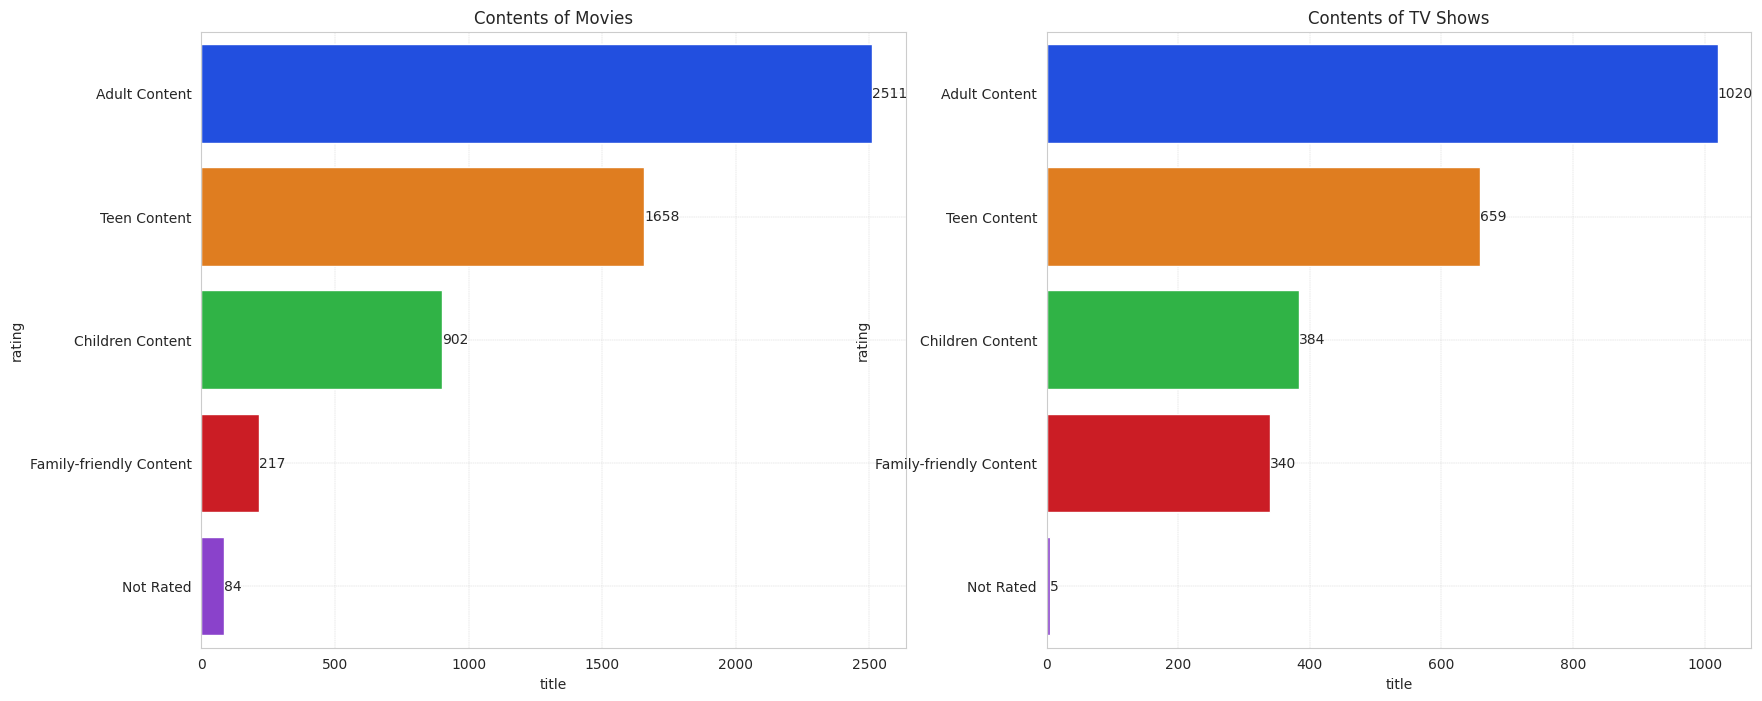

In [36]:
# Chart - 11 visualization code of contents of movies and tv shows
plt.figure(figsize=(20,8))
for i,j,k in ((df_movies, 'Movies',0),(df_tvshows, 'TV Shows',1)):
  plt.subplot(1,2,k+1)
  df_country = i.groupby(['rating']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)
  plots= sns.barplot(y = "rating",x = 'title', data = df_country, palette='bright')
  plt.title(f'Contents of {j}')
  plt.grid(linestyle='--', linewidth=0.3)
  plots.bar_label(plots.containers[0])
plt.show()

##### 1. Why did you pick the specific chart?

To identify the number of movies in each conents.

##### 2. What is/are the insight(s) found from the chart?

 Netflix have more movies and TV shows on Adult content and less on Family-Friendly content.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Family-Friendly content movies and TV shows are less in netflix they can add some good movies and shows.

#### Chart - 12

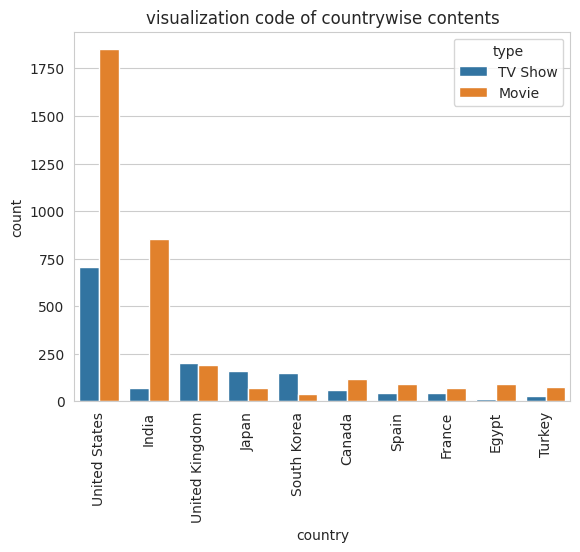

In [37]:
# Chart - 12 visualization code of countrywise contents
cty=df[df['country']!=' ']
sns.countplot(data=cty,x='country',hue='type',order=cty.country.value_counts().iloc[:10].index)
plt.xticks(rotation=90)
plt.title('visualization code of countrywise contents')
plt.show()

##### 1. Why did you pick the specific chart?

To check available movies and Tv shows in countrywise.

##### 2. What is/are the insight(s) found from the chart?

More movies and TV shows from USA and more movies and less TV shows from india.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Indian TV shows are very less.Netflix can identify the reasons and improve it.

#### Chart - 13

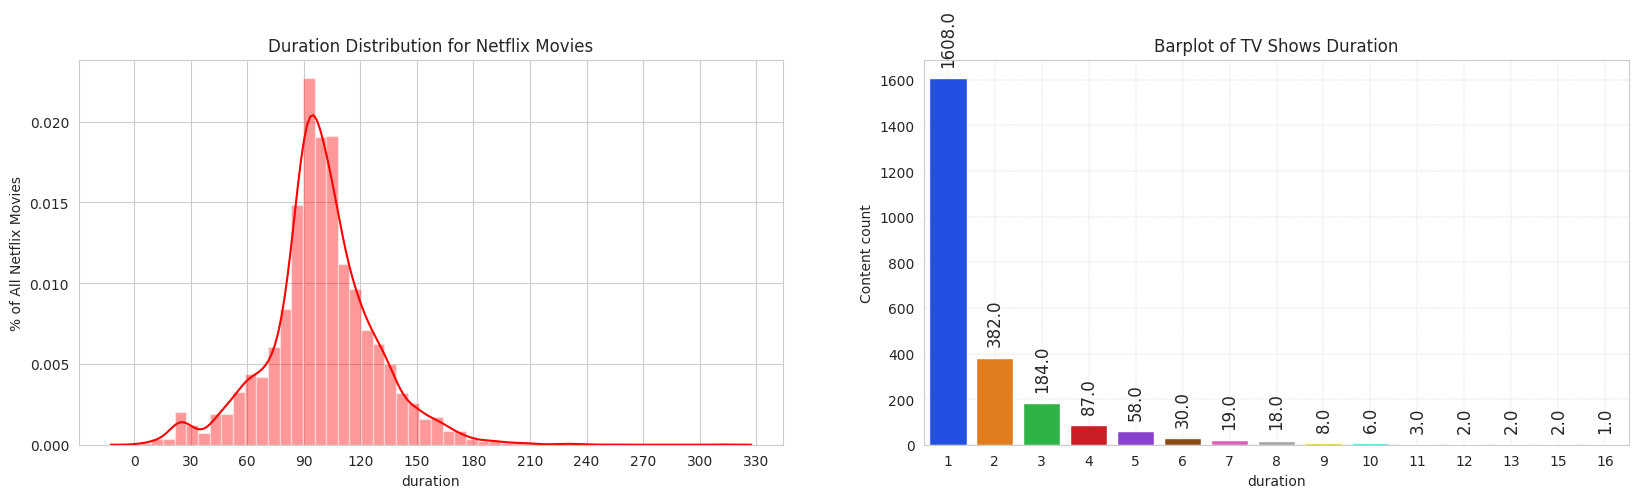

In [38]:
# Chart - 13 visualization code of Duration of movies and Tv shows
fig, ax = plt.subplots(1,2, figsize=(20, 5))
g1 = sns.distplot(df_movies.duration, color='red',ax=ax[0]);
g1.set_xticks(np.arange(0,360,30))
g1.set_title("Duration Distribution for Netflix Movies")
g1.set_ylabel("% of All Netflix Movies")

df_duration = df_tvshows.groupby(['duration']).agg({'title':'nunique'}).reset_index().sort_values(by=['duration'],ascending=False)
plots= sns.barplot(x = 'duration',y='title', data = df_duration, palette='bright')
plt.title(f'Barplot of TV Shows Duration')
plt.ylabel(f"Content count")
plt.grid(linestyle='--', linewidth=0.3)
for bar in plots.patches:
   plots.annotate(bar.get_height(),
                  (bar.get_x() + bar.get_width() / 2,
                   bar.get_height()), ha='center', va='bottom',
                  size=12, xytext=(0, 8),
                  textcoords='offset points', rotation=90)

##### 1. Why did you pick the specific chart?

To check the duration of movies and Tv shows.

##### 2. What is/are the insight(s) found from the chart?

Most of the movie duration are between 80 to 120 minutes.The most of the TV shows are in season 1.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

TV shows season 2 and more are very less.Netflix can identify the reasons and improve it.

#### Chart - 14 - Correlation Heatmap

In [39]:
# Correlation Heatmap visualization code
# Creating data for top 10 countries
df['count'] = 1
data= df.groupby('country')[['country','count']].sum().sort_values(by='count',ascending = False).reset_index()[:10]
data = data['country']
data

0     United States
1             India
2    United Kingdom
3             Japan
4       South Korea
5            Canada
6             Spain
7            France
8             Egypt
9            Mexico
Name: country, dtype: string

In [40]:
# Data preparation for heatmap
df['count'] = 1
# Top 10 countries based on count
data = df.groupby('country')[['country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:12]
data = data['country']

df_heatmap = df.loc[df['country'].isin(data)]
df_heatmap = pd.crosstab(df_heatmap['country'],df_heatmap['rating'],normalize = "index").T
df_heatmap

country                  Australia       Canada          Egypt           \
rating                                                                    
Adult Content                  0.463415        0.435028        0.277228   
Children Content               0.219512        0.254237        0.039604   
Family-friendly Content        0.134146        0.152542        0.000000   
Not Rated                      0.024390        0.011299        0.000000   
Teen Content                   0.158537        0.146893        0.683168   

country                  France          India           Japan           \
rating                                                                    
Adult Content                  0.669565        0.249187        0.364444   
Children Content               0.052174        0.157096        0.200000   
Family-friendly Content        0.104348        0.019502        0.080000   
Not Rated                      0.008696        0.006501        0.000000   
Teen Content                   0.165217        0.567714        0.355556   

country                  Mexico          South Korea     Spain           \
rating                                                                    
Adult Content                      0.73        0.453552        0.828358   
Children Content                   0.07        0.087432        0.052239   
Family-friendly Content            0.02        0.060109        0.014925   
Not Rated                          0.04        0.016393        0.007463   
Teen Content                       0.14        0.382514        0.097015   

country                  Turkey          United Kingdom  United States   
rating                                                                   
Adult Content                      0.50        0.501259        0.487853  
Children Content                   0.11        0.244332        0.192398  
Family-friendly Content            0.00        0.052897        0.068574  
Not Rated                          0.03        0.012594        0.014107  
Teen Content                       0.36        0.188917        0.237069

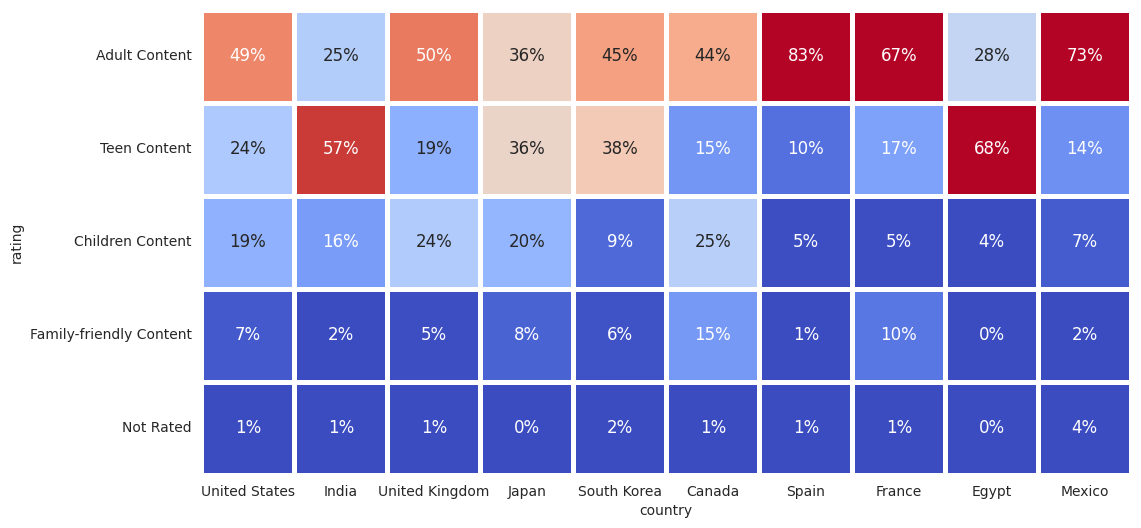

In [41]:
# Plotting the heatmap
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

# setting order
country_order = ['United States', 'India', 'United Kingdom','Japan', 'South Korea', 'Canada', 'Spain', 'France','Egypt', 'Mexico']

age_order = ['Adult Content','Teen Content', 'Children Content', 'Family-friendly Content', 'Not Rated']

# calling and plotting heatmap
sns.heatmap(df_heatmap.loc[age_order,country_order],cmap='coolwarm',square=True, linewidth=2.5,cbar=False,
            annot=True,fmt='1.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":12})
plt.show()

##### 1. Why did you pick the specific chart?

To check the correlation between each variables.

##### 2. What is/are the insight(s) found from the chart?

It was found that most of the countries produces content related to Adult and Teen.
Most adult contents produced by Spain, Maxico and France.
Egypt, India produces most of the Teen content.
Canada produces Children and Family content in better ratio in compaired with other countries, along with Adult and teen content.
India has less Adult content with respect to other top countries.

In [42]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'day_added', 'year_added', 'month_added', 'count'],
      dtype='object')

#### Chart - 15 - Pair Plot 

Text(0.5, 1.0, 'Duration of contents v/s Rating')

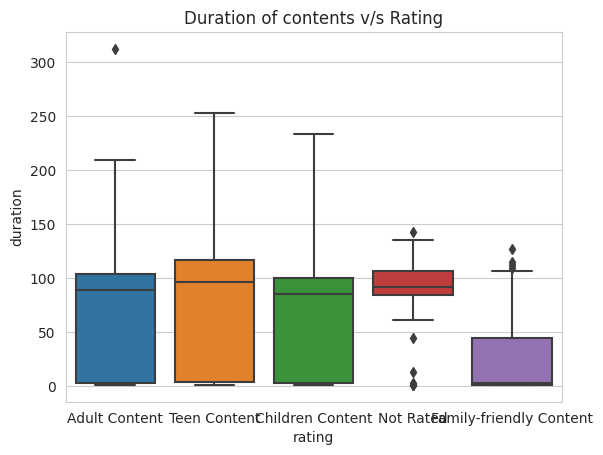

In [43]:
# Pair Plot visualization code Rating Vs Duration
sns.boxplot(x=df['rating'],y=df['duration'])
plt.title('Duration of contents v/s Rating')

##### 1. Why did you pick the specific chart?

To check the duration in each contents.

##### 2. What is/are the insight(s) found from the chart?

Teen and Adult contents duration are more Family-Friend content duration are less.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

**Hypothetical Statement 1.** 
**H0** : The proportion of TV shows added on Netflix that are produced in the India is not significantly different from the proportion of movies added on Netflix that are produced in the India.

**H1**: The proportion of TV shows added on Netflix that are produced in the India is significantly different from the proportion of movies added on Netflix that are produced in the India.

**Hypothetical Statement 2.** 
**H0**: - The Country is independent of Target_ages.

**H1**: - The Country is associated with Target_ages.

**Hypothetical Statement3.** 
**H0**: The proportion of TV shows added on Netflix that contains Adult content is not significantly different from the proportion of movies added on Netflix that contains Teen content.

**H1**: The proportion of TV shows added on Netflix that contains Adult content is significantly different from the proportion of movies added on Netflix that contains Teen content.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Ho:** The proportion of TV shows added on Netflix that are produced in the **India** is **not significantly different** from the proportion of movies added on Netflix that are produced in the **India**.

**H1:** The proportion of TV shows added on Netflix that are produced in the **India** is **significantly different** from the proportion of movies added on Netflix that are produced in the **India**.

#### 2. Perform an appropriate statistical test.

In [44]:
# Perform Statistical Test to obtain P-Value
from statsmodels.stats.proportion import proportions_ztest  #------> This function is used to perform z test of proportion.

# Calculate the proportion of drama and comedy movies
tv_proportion = np.sum(df_tvshows['country'].str.contains('India')) / len(df_tvshows)
movie_proportion = np.sum(df_movies['country'].str.contains('India')) / len(df_movies)

# Set up the parameters for the z-test
count = [int(tv_proportion * len(df_tvshows)), int(movie_proportion * len(df_movies))]
nobs = [len(df_tvshows), len(df_movies)]
alternative = 'two-sided'

# Perform the z-test
z_stat, p_value = proportions_ztest(count=count, nobs=nobs, alternative=alternative)
print('z-statistic: ', z_stat)
print('p-value: ', p_value)

# Set the significance level
alpha = 0.05

# Print the results of the z-test
if p_value < alpha:
    print(f"Reject the null hypothesis.")
else:
    print(f"Fail to reject the null hypothesis.")

z-statistic:  -17.027660214972514
p-value:  5.121127706949897e-65
Reject the null hypothesis.


##### Which statistical test have you done to obtain P-Value?

z test was conducted to obtain the p value

##### Why did you choose the specific statistical test?

z test was choosen because it is appropriate for comparing two proportions, and it helps us to determine whether the difference between the two proportions is due to chance or not.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Ho:** - The Country is independent of Target_ages.

**H1:** - The Country is associated with Target_ages.

#### 2. Perform an appropriate statistical test.

In [45]:
# Preparing heatmap for country and rating
df['count'] = 1
# Top 10 countries based on count
data = df.groupby('country')[['country','count']].sum().sort_values(by='count',ascending=False).reset_index()
data = data['country']

df_heatmap = df.loc[df['country'].isin(data)]
df_heatmap = pd.crosstab(df_heatmap['country'],df_heatmap['rating'],normalize = "index").T
h2 = df_heatmap.T

In [46]:
h2

rating                                             Adult Content            \
country                                                                      
Argentina                                                              0.7   
Argentina, Brazil, France, Poland, Germany, De...                      0.0   
Argentina, Chile                                                       0.0   
Argentina, Chile, Peru                                                 1.0   
Argentina, France                                                      1.0   
...                                                                    ...   
Venezuela                                                              0.0   
Venezuela, Colombia                                                    0.0   
Vietnam                                                                0.4   
West Germany                                                           1.0   
Zimbabwe                                                               0.0   

rating                                             Children Content         \
country                                                                      
Argentina                                                             0.08   
Argentina, Brazil, France, Poland, Germany, De...                     0.00   
Argentina, Chile                                                      0.00   
Argentina, Chile, Peru                                                0.00   
Argentina, France                                                     0.00   
...                                                                    ...   
Venezuela                                                             0.00   
Venezuela, Colombia                                                   0.00   
Vietnam                                                               0.20   
West Germany                                                          0.00   
Zimbabwe                                                              1.00   

rating                                             Family-friendly Content  \
country                                                                      
Argentina                                                             0.04   
Argentina, Brazil, France, Poland, Germany, De...                     0.00   
Argentina, Chile                                                      0.00   
Argentina, Chile, Peru                                                0.00   
Argentina, France                                                     0.00   
...                                                                    ...   
Venezuela                                                             0.00   
Venezuela, Colombia                                                   0.00   
Vietnam                                                               0.00   
West Germany                                                          0.00   
Zimbabwe                                                              0.00   

rating                                             Not Rated                \
country                                                                      
Argentina                                                             0.04   
Argentina, Brazil, France, Poland, Germany, De...                     0.00   
Argentina, Chile                                                      0.00   
Argentina, Chile, Peru                                                0.00   
Argentina, France                                                     0.00   
...                                                                    ...   
Venezuela                                                             0.00   
Venezuela, Colombia                                                   1.00   
Vietnam                                                               0.00   
West Germany                                                          0.00   
Zimbabwe           

In [47]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import chi2_contingency
X2, p_value, degree_freedom, expected_values = chi2_contingency(h2, correction = True)
print("X2: {0}, P-Value: {1}".format(X2,p_value)) 

# Print the results of the z-test
if p_value < alpha:
    print(f"Reject the null hypothesis.")
else:
    print(f"Fail to reject the null hypothesis.")

X2: 2323.102270956884, P-Value: 0.9999999923697032
Fail to reject the null hypothesis.


##### Which statistical test have you done to obtain P-Value?

Chi square test was conducted to obtain the p value

##### Why did you choose the specific statistical test?

The aforementioned test is used to compare observed results with expected results.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Ho:** The proportion of **TV shows** added on Netflix that contains **Adult content** is not significantly different from the proportion of **movies** added on Netflix that contains **Teen content**.

**H1:** The proportion of **TV shows** added on Netflix that contains **Adult content** is significantly different from the proportion of **movies** added on Netflix that contains **Teen content**.

#### 2. Perform an appropriate statistical test.

In [48]:
# Perform Statistical Test to obtain P-Value
from statsmodels.stats.proportion import proportions_ztest  

# Calculate the proportion of Adult Content and Teen Content
tv_proportion = np.sum(df_tvshows['rating'].str.contains('Adult Content')) / len(df_tvshows)
movie_proportion = np.sum(df_movies['rating'].str.contains('Teen Content')) / len(df_movies)

# Set up the parameters for the z-test
count = [int(tv_proportion * len(df_tvshows)), int(movie_proportion * len(df_movies))]
nobs = [len(df_tvshows), len(df_movies)]
alternative = 'two-sided'

# Perform the z-test
z_stat, p_value = proportions_ztest(count=count, nobs=nobs, alternative=alternative)
print('z-statistic: ', z_stat)
print('p-value: ', p_value)

# Set the significance level
alpha = 0.05

# Print the results of the z-test
if p_value < alpha:
    print(f"Reject the null hypothesis.")
else:
    print(f"Fail to reject the null hypothesis.")

z-statistic:  9.866383718029187
p-value:  5.822601872504271e-23
Reject the null hypothesis.


##### Which statistical test have you done to obtain P-Value?

Two sample proprtion z test was used to obtain p value

##### Why did you choose the specific statistical test?

Aforementioned statistical test was used to compar two proportions, and it helps us to determine whether the difference between the two proportions is due to chance or not.

## ***6. Feature Engineering & Data Pre-processing***

In [49]:
# Checking all the features
df.head(1)

show_id     type title director  \
0      s1  TV Show    3%     <NA>   

                                                cast country date_added  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...  Brazil 2020-08-14   

   release_year         rating  duration  \
0          2020  Adult Content         4   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   

                                         description  day_added  year_added  \
0  In a future where the elite inhabit an island ...       14.0      2020.0   

   month_added  count  
0          8.0      1

In [50]:
# droping unnecessory columns
df.drop(['day_added', 'year_added', 'month_added', 'count'],axis =1 ,inplace =True)

In [51]:
# checking the udation in dataframe
df.head(1)

show_id     type title director  \
0      s1  TV Show    3%     <NA>   

                                                cast country date_added  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...  Brazil 2020-08-14   

   release_year         rating  duration  \
0          2020  Adult Content         4   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   

                                         description  
0  In a future where the elite inhabit an island ...

### 1. Handling Missing Values

In [52]:
# Applying function to check missing values
all_columns_info(df) 

Selected DataFrame has 12 columns and 7787 rows.


No of Null Values  % of null values  No of unique values  \
director                   2389              30.7                 4049   
cast                        718               9.2                 6831   
country                     507               6.5                  681   
date_added                   10               0.1                 1512   
rating                        7               0.1                    5   
show_id                       0               0.0                 7787   
type                          0               0.0                    2   
title                         0               0.0                 7787   
release_year                  0               0.0                   73   
duration                      0               0.0                  206   
listed_in                     0               0.0                  492   
description                   0               0.0                 7769   

                   Data Type  
director              string  
cast                  string  
country               string  
date_added    datetime64[ns]  
rating                string  
show_id               object  
type                  string  
title                 string  
release_year           int64  
duration               int64  
listed_in             string  
description           string

In [53]:
# Handling Missing Values & Missing Value Imputation
# imputing with unknown in null values of director and cast feature
df[['director','cast']]=df[['director','cast']].fillna("Unknown")
# imputing with United States in null values of country
df['country']=df['country'].fillna('United States')


In [54]:
# Dropping  null values in date added and rating columns
df.dropna(subset=['date_added','rating'],inplace=True)

In [55]:
# checking the dataframe after imputation
all_columns_info(df)

Selected DataFrame has 12 columns and 7770 rows.


No of Null Values  % of null values  No of unique values  \
show_id                       0               0.0                 7770   
type                          0               0.0                    2   
title                         0               0.0                 7770   
director                      0               0.0                 4048   
cast                          0               0.0                 6818   
country                       0               0.0                  681   
date_added                    0               0.0                 1511   
release_year                  0               0.0                   73   
rating                        0               0.0                    5   
duration                      0               0.0                  206   
listed_in                     0               0.0                  491   
description                   0               0.0                 7752   

                   Data Type  
show_id               object  
type                  string  
title                 string  
director              string  
cast                  string  
country               string  
date_added    datetime64[ns]  
release_year           int64  
rating                string  
duration               int64  
listed_in             string  
description           string

#### What all missing value imputation techniques have you used and why did you use those techniques?

Null values of country column were replaced by mode of that column, as a country producing most of the content might be a better option for replacement of null value.

Director and cast columns null values were replaced with "unknown".

null values of rating and date_added columns have been dropped

### 2. Handling Outliers

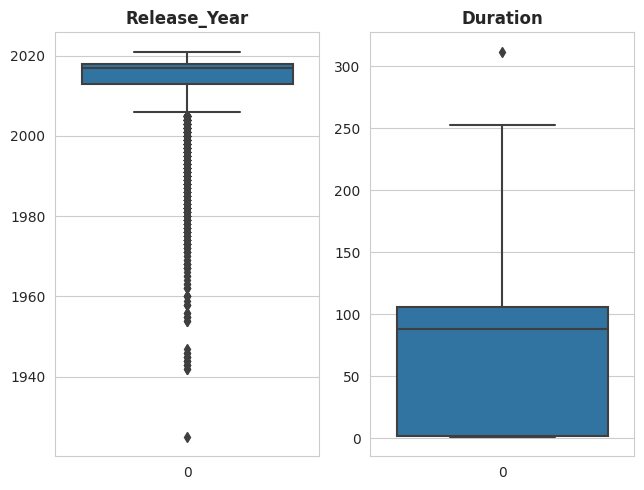

In [56]:
# Handling Outliers & Outlier treatments
continous_value_feature= ["release_year","duration"]
plt.figure(figsize=(16,5))
for n,column in enumerate(continous_value_feature):
  plt.subplot(1, 5, n+1)
  sns.boxplot(df[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

##### What all outlier treatment techniques have you used and why did you use those techniques?

Some of the anomalies in continous feature but it will not be treated by considering outliers as some of the Movies/TV Shows has released or added early on Netflix.

In [57]:
# Copy of dataset created for further process
df_copy = df.copy()

In [58]:
# Checking the new dataframe
df_copy.head(1)

show_id     type title director  \
0      s1  TV Show    3%  Unknown   

                                                cast country date_added  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...  Brazil 2020-08-14   

   release_year         rating  duration  \
0          2020  Adult Content         4   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   

                                         description  
0  In a future where the elite inhabit an island ...

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [59]:
# Expand Contraction
cluster_df = df_copy[['title']]
cluster_df['cluster_data'] = (df_copy['description'] + ' ' + df_copy['listed_in'] + ' ' + df_copy['director'] + ' ' + df_copy['cast'] + ' ' + df_copy['country'] + ' ' + df_copy['rating']).astype(str)
cluster_df.set_index('title', inplace = True)
cluster_df.head()

cluster_data
title                                                   
3%     In a future where the elite inhabit an island ...
7:19   After a devastating earthquake hits Mexico Cit...
23:59  When an army recruit is found dead, his fellow...
9      In a postapocalyptic world, rag-doll robots hi...
21     A brilliant group of students become card-coun...

#### 2. Lower Casing

In [60]:
# Lower Casing
cluster_df['cluster_data'] = cluster_df['cluster_data'].str.lower()

In [61]:
# check for updation
cluster_df['cluster_data'][0]

'in a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor. international tv shows, tv dramas, tv sci-fi & fantasy unknown joão miguel, bianca comparato, michel gomes, rodolfo valente, vaneza oliveira, rafael lozano, viviane porto, mel fronckowiak, sergio mamberti, zezé motta, celso frateschi brazil adult content'

#### 3. Removing Punctuations

In [62]:
# Remove Punctuations
# Creating function for removing punctuations
def remove_punctuation(text):
    '''a function for removing punctuation'''
    #imorting needed library
    import string
    # replacing the punctuations with no space, which in effect deletes the punctuation marks
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)
    
cluster_df['cluster_data'] = cluster_df['cluster_data'].apply(remove_punctuation)
cluster_df['cluster_data'][0]


'in a future where the elite inhabit an island paradise far from the crowded slums you get one chance to join the 3 saved from squalor international tv shows tv dramas tv scifi  fantasy unknown joão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschi brazil adult content'

#### 4. Removing URLs & Removing words and digits contain digits.

In [63]:
# Remove URLs & Remove words and digits contain digits
# Creating function for removing URL and numbers from the given sentence
def remove_url_and_numbers(text):
    '''This function is used to remove the URL's and Numbers from the given sentence'''
    # importing needed libraries
    import re
    import string

    # Replacing the URL's with no space
    url_number_pattern = re.compile(r'https?://\S+|www\.\S+')
    text= re.sub(url_number_pattern,'', text)

    # Replacing the digits with one space
    text = re.sub('[^a-zA-Z]', ' ', text)

    # return the text stripped off URL's and Numbers
    return text

In [64]:
# Applying the function to Remove URLs & Remove words and digits contain digits
cluster_df['cluster_data'] = cluster_df['cluster_data'].apply(remove_url_and_numbers)

# Checking the observation after manipulation
cluster_df['cluster_data'][0]

'in a future where the elite inhabit an island paradise far from the crowded slums you get one chance to join the   saved from squalor international tv shows tv dramas tv scifi  fantasy unknown jo o miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zez  motta celso frateschi brazil adult content'

#### 5. Removing Stopwords & Removing White spaces

In [65]:
# Remove Stopwords
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words=stopwords.words('english')
# Creating function to remove the stop words and whitespace
def stopwords(text):
    '''a function for removing the stopword'''
    text = [word.lower() for word in text.split() if word.lower() not in stop_words]
    text =  " ".join(text)
    
    # removing whitespace
    text = re.sub(r'\s+', ' ', text)

    # return the manipulated string
    return text



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [66]:
# Applying the function to remove stop words and white space
cluster_df['cluster_data'] = cluster_df['cluster_data'].apply(stopwords)
# Checking the data after manipulation
cluster_df['cluster_data'][0]

'future elite inhabit island paradise far crowded slums get one chance join saved squalor international tv shows tv dramas tv scifi fantasy unknown jo miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zez motta celso frateschi brazil adult content'

#### 6. Rephrase Text

In [101]:
# Rephrase Text
cluster_df['cluster_data'][5]

'genetics professor experiment treatment comatose sister blend medical shamanic cure unlocks shocking side effect international tv show tv drama tv mystery serdar akar erdal ik io lu yasemin allen melis birkan sayg n soysal berkan al metin belgin ay eren selin uludo zay fecht suna ld zo lu turkey adult content'

#### 7. Tokenization

In [68]:
# Tokenization
# Downloading nltk libraries
nltk.download('punkt')

# Tokenization
cluster_df['cluster_data'] = cluster_df['cluster_data'].apply(nltk.word_tokenize)

# Checking the observation after manipulation
cluster_df['cluster_data'][0]
     

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['future',
 'elite',
 'inhabit',
 'island',
 'paradise',
 'far',
 'crowded',
 'slums',
 'get',
 'one',
 'chance',
 'join',
 'saved',
 'squalor',
 'international',
 'tv',
 'shows',
 'tv',
 'dramas',
 'tv',
 'scifi',
 'fantasy',
 'unknown',
 'jo',
 'miguel',
 'bianca',
 'comparato',
 'michel',
 'gomes',
 'rodolfo',
 'valente',
 'vaneza',
 'oliveira',
 'rafael',
 'lozano',
 'viviane',
 'porto',
 'mel',
 'fronckowiak',
 'sergio',
 'mamberti',
 'zez',
 'motta',
 'celso',
 'frateschi',
 'brazil',
 'adult',
 'content']

#### 8. Text Normalization

In [69]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
# Importing WordNetLemmatizer from nltk module
from nltk.stem import WordNetLemmatizer

# Creating instance for wordnet
wordnet  = WordNetLemmatizer()

In [70]:
# Creating function for lemmatization
def lemmatizing_sentence(text):
    '''This function is used for lemmatizing (changing the given word into meaningfull word) the words from the given sentence'''
    text = [wordnet.lemmatize(word) for word in text]

    # joining the list of words with space separator
    text=  " ".join(text)

    # return the manipulated string
    return text

In [71]:
# Downloading needed libraries
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Rephrasing text by applying defined lemmatizing function
cluster_df['cluster_data'] = cluster_df['cluster_data'].apply(lemmatizing_sentence)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [72]:
# Checking the data after manipulation
cluster_df['cluster_data'][0]

'future elite inhabit island paradise far crowded slum get one chance join saved squalor international tv show tv drama tv scifi fantasy unknown jo miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zez motta celso frateschi brazil adult content'

##### Which text normalization technique have you used and why?

Lemmatization technique was used instead of Stemming because more accurate base word, it can handle different inflections, it produces real words,it improves text understanding and it supports multiple languages.

#### 9. Part of speech tagging

In [73]:
# POS Taging
# Tokenize the text into words before POS Taging
cluster_df['pos_tags'] = cluster_df['cluster_data'].apply(nltk.word_tokenize).apply(nltk.pos_tag)

# Checking the observation after manipulation
cluster_df.head(5)

cluster_data  \
title                                                      
3%     future elite inhabit island paradise far crowd...   
7:19   devastating earthquake hit mexico city trapped...   
23:59  army recruit found dead fellow soldier forced ...   
9      postapocalyptic world ragdoll robot hide fear ...   
21     brilliant group student become cardcounting ex...   

                                                pos_tags  
title                                                     
3%     [(future, JJ), (elite, JJ), (inhabit, NN), (is...  
7:19   [(devastating, VBG), (earthquake, NN), (hit, V...  
23:59  [(army, NN), (recruit, NN), (found, VBN), (dea...  
9      [(postapocalyptic, JJ), (world, NN), (ragdoll,...  
21     [(brilliant, JJ), (group, NN), (student, NN), ...

#### 10. Text Vectorization

In [74]:
# Vectorizing Text
# Importing Tfidvectorizer libraries
from sklearn.feature_extraction.text import TfidfVectorizer

# Text Vectorization
tfidf = TfidfVectorizer(max_features=30000,stop_words='english')

#get the tf-idf scores
#create TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(cluster_df['cluster_data'])

#shape of tfidf_matrix
tfidf_matrix.shape

(7770, 30000)

##### Which text vectorization technique have you used and why?

TFIDF vectorization technique was used in place of BAG OF WORDS because Tf-idf vectorization takes into account the importance of each word in a document. TF-IDF also assigns higher values to rare words that are unique to a particular document, making them more important in the representation.

### 11. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

* Fewer features mean less complexity.

* You will need less storage space because you have fewer data.

* Fewer features require less computation time.

* Model accuracy improves due to less misleading data.

* Reducing the data set’s feature dimensions helps visualize the data faster.

* It removes noise and redundant features.

there are 30,000 arrtibutes are created in text vectorization and this huge amount of columns cannot be dealed with our local machines. So, we will using the Principal Component Analysis(PCA) techniques to reduce the dimensions of this huge sparse matrix.

In [75]:
# DImensionality Reduction (If needed)
from sklearn.decomposition import PCA

# Defining PCA object with desired number of components
pca = PCA()

# Fitting the PCA model
pca.fit(tfidf_matrix.toarray())

# percent of variance captured by each component
variance = pca.explained_variance_ratio_
print(f"Explained variance: {variance}")

Explained variance: [6.70788881e-03 4.20394616e-03 3.33821717e-03 ... 4.11210944e-36
 3.32107636e-36 5.36413552e-37]


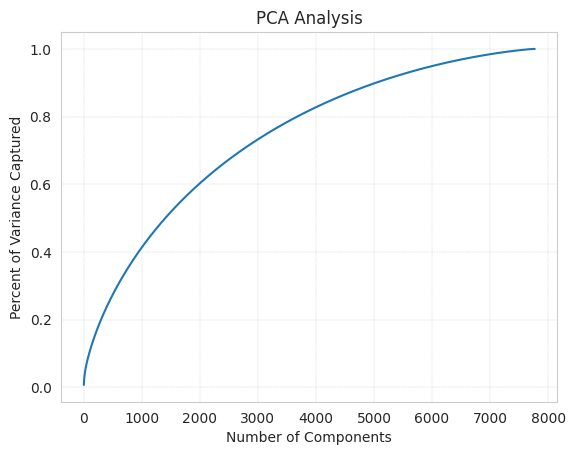

In [76]:
# Ploting the percent of variance captured versus the number of components in order to determine the reduced dimensions
fig, ax = plt.subplots()
ax.plot(range(1, len(variance)+1), np.cumsum(pca.explained_variance_ratio_))
ax.set_xlabel('Number of Components')
ax.set_ylabel('Percent of Variance Captured')
ax.set_title('PCA Analysis')
plt.grid(linestyle='--', linewidth=0.3)
plt.show()

It is identified from above plot that  **7770 principal components can capture the 100% of variance.** For our case we will consider only those number of PC's that can capture 95% of variance.

In [77]:
# Now we are passing the argument so that we can capture 95% of variance.
# Defining instance
pca_tuned = PCA(n_components=0.95)

# Fitting and transforming the model
pca_tuned.fit(tfidf_matrix.toarray())
tfidf_matrix_transformed = pca_tuned.transform(tfidf_matrix.toarray())

# Checking the shape of transformed matrix
tfidf_matrix_transformed.shape

(7770, 6017)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Principle Component Analysis technique was used.The aim of PCA is to reduce the number of variables of a data set, while preserving as much information as possible.

## ***7. ML Model Implementation***

### ML Model - 1 K Means Clustering

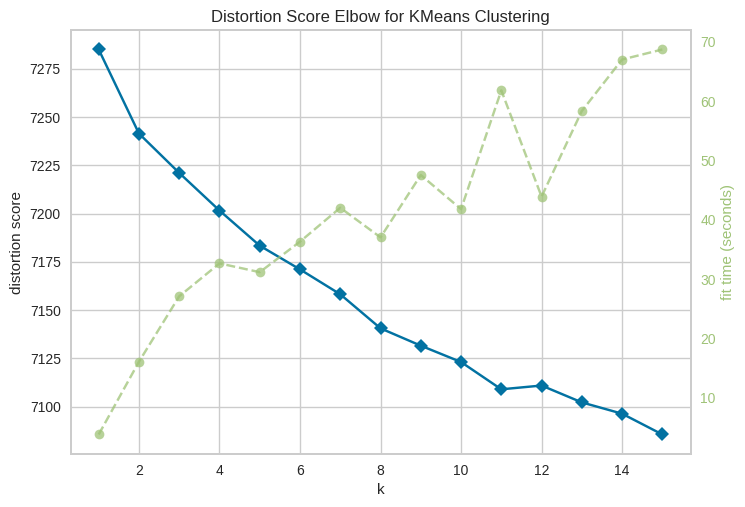

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [78]:
# ML Model - 1 Implementation
# Importing needed library
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans(random_state=0)
visualizer = KElbowVisualizer(model, k=(1,16),locate_elbow=False)

# Fit the data to the visualizer
visualizer.fit(tfidf_matrix_transformed)

# Finalize and render the figure
visualizer.show() 

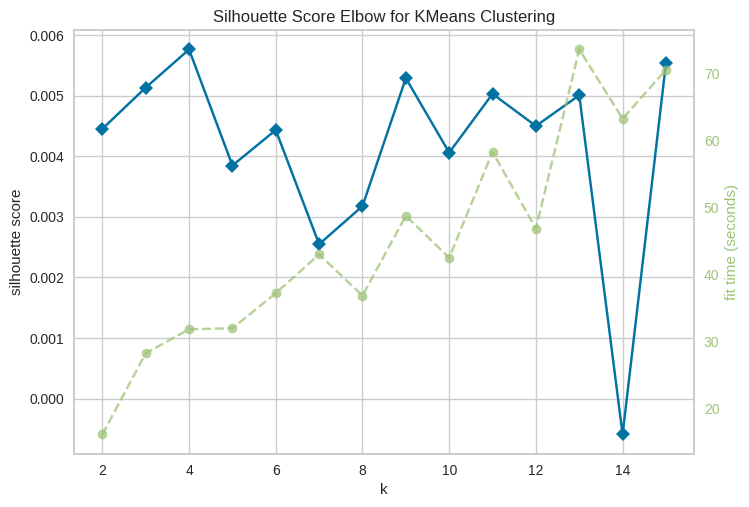

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [79]:
## Determining optimal value of K using KElbowVisualizer
# Importing needed library
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
visualizer = KElbowVisualizer(model, k=(2,16), metric='silhouette', timings=True, locate_elbow=False)

# Fit the data to the visualizer
visualizer.fit(tfidf_matrix_transformed)

# Finalize and render the figure
visualizer.show()      

In [80]:
## Computing Silhouette score for each k
# Importing needed libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Defining Range
k_range = range(2, 6)
for k in k_range:
    Kmodel = KMeans(n_clusters=k)
    labels = Kmodel.fit_predict(tfidf_matrix_transformed)
    score = silhouette_score(tfidf_matrix_transformed, labels)
    print("k=%d, Silhouette score=%f" % (k, score))

k=2, Silhouette score=0.004450
k=3, Silhouette score=0.004895
k=4, Silhouette score=0.005661
k=5, Silhouette score=0.005799


From the above plots (Elbow plot and Sillhouette plot) it is very clear that the Silhoutte score is comparatively good for 4 number of clusters, so we will consider **4 cluster** in kmeans analysis.

Now let's plot and see how our data points look like after assigning to their respective clusters.

#### Creating 2-D curve Clustered Data

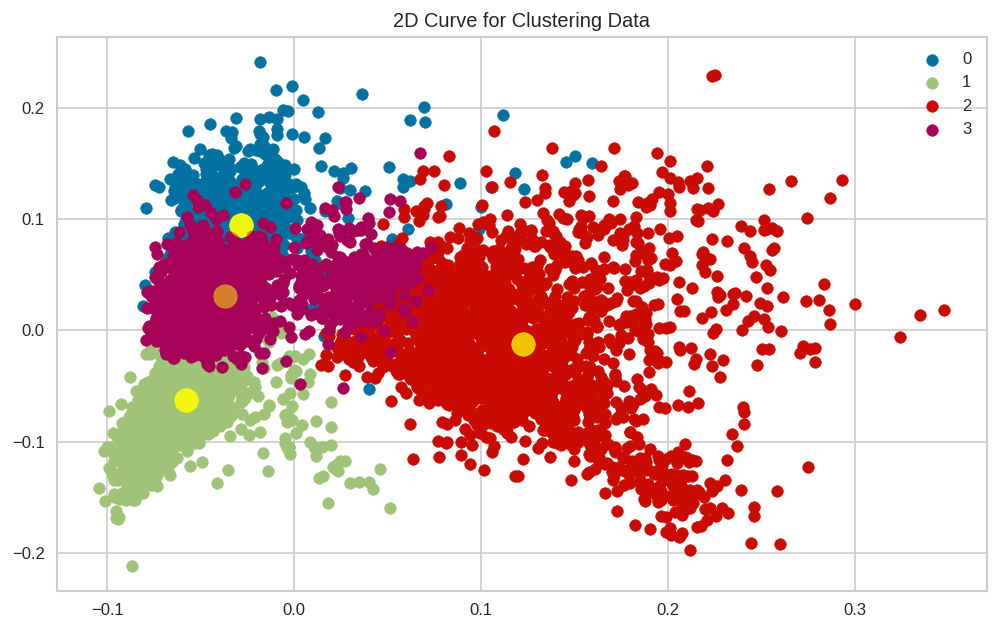

In [81]:
#training the K-means model on a dataset  
kmeans = KMeans(n_clusters=4, init='k-means++', random_state= 0)  

#predict the labels of clusters.
plt.figure(figsize=(10,6), dpi=120)
label = kmeans.fit_predict(tfidf_matrix_transformed)
#Getting unique labels
unique_labels = np.unique(label)
 
#plotting the results:
for i in unique_labels:
    plt.scatter(tfidf_matrix_transformed[label == i , 0] , tfidf_matrix_transformed[label == i , 1] , label = i)
    centers = kmeans.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='yellow', s=200, alpha=0.5)
plt.legend()
plt.title('2D Curve for Clustering Data')
plt.show()

#### Creating 3D curve for Clustered Data

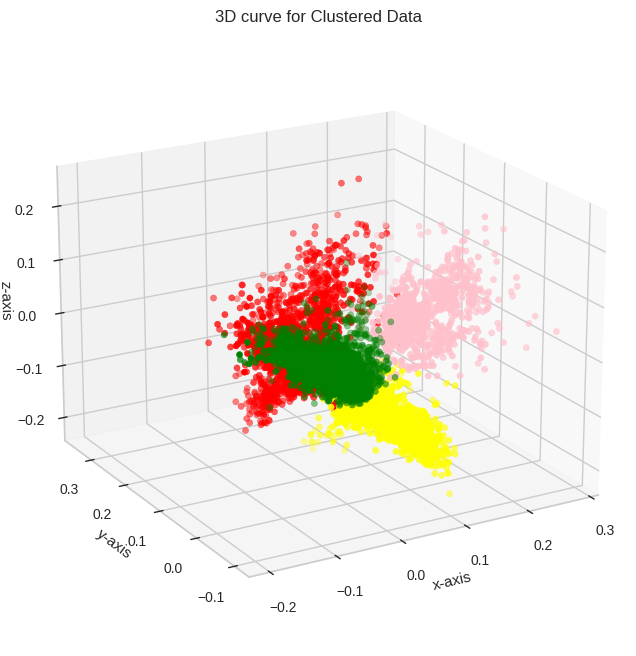

In [82]:
# Importing library to visualize clusters in 3D
from mpl_toolkits.mplot3d import Axes3D

# Plot the clusters in 3D
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111, projection='3d')
colors = ['pink', 'yellow', 'red', 'green']
for i in range(len(colors)):
    ax.scatter(tfidf_matrix_transformed[kmeans.labels_ == i, 2], tfidf_matrix_transformed[kmeans.labels_ == i, 0], tfidf_matrix_transformed[kmeans.labels_ == i, 1], c=colors[i])

# Rotate the plot 30 degrees around the X axis and 45 degrees around the Z axis
ax.view_init(elev=20, azim=-120)
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
plt.title('3D curve for Clustered Data')
plt.show()

In [83]:
# Adding cluster values to the dateframe.
df_copy ['kmeans_cluster'] = kmeans.labels_

In [84]:
# Checking the updation
df_copy.head()

show_id     type  title           director  \
0      s1  TV Show     3%            Unknown   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

  date_added  release_year         rating  duration  \
0 2020-08-14          2020  Adult Content         4   
1 2016-12-23          2016  Adult Content        93   
2 2018-12-20          2011  Adult Content        78   
3 2017-11-16          2009   Teen Content        80   
4 2020-01-01          2008   Teen Content       123   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  kmeans_cluster  
0  In a future where the elite inhabit an island ...               2  
1  After a devastating earthquake hits Mexico Cit...               1  
2  When an army recruit is found dead, his fellow...               1  
3  In a postapocalyptic world, rag-doll robots hi...               3  
4  A brilliant group of students become card-coun...               3

#### 1. Explain the ML Model used and it's performance.

In [85]:
# Visualizing evaluation Metric Score chart
# Creating the function for worcloud
def kmeans_wordcloud(cluster_number, column_name):
    '''function for Building a wordcloud for the movie/shows'''
    
    #Importing libraries
    from wordcloud import WordCloud, STOPWORDS
    
    # Filter the data by the specified cluster number and column name
    df_wordcloud = df_copy[['kmeans_cluster', column_name]].dropna()
    df_wordcloud = df_wordcloud[df_wordcloud['kmeans_cluster'] == cluster_number]
    df_wordcloud = df_wordcloud[df_wordcloud[column_name].str.len() > 0] 
    
    # Combine all text documents into a single string
    text = " ".join(word for word in df_wordcloud[column_name])
    
    # Create the word cloud
    wordcloud = WordCloud(stopwords=set(STOPWORDS), background_color="black").generate(text)
    
    # Convert the wordcloud to a numpy array
    image_array = wordcloud.to_array()
    
    # Return the numpy array
    return image_array

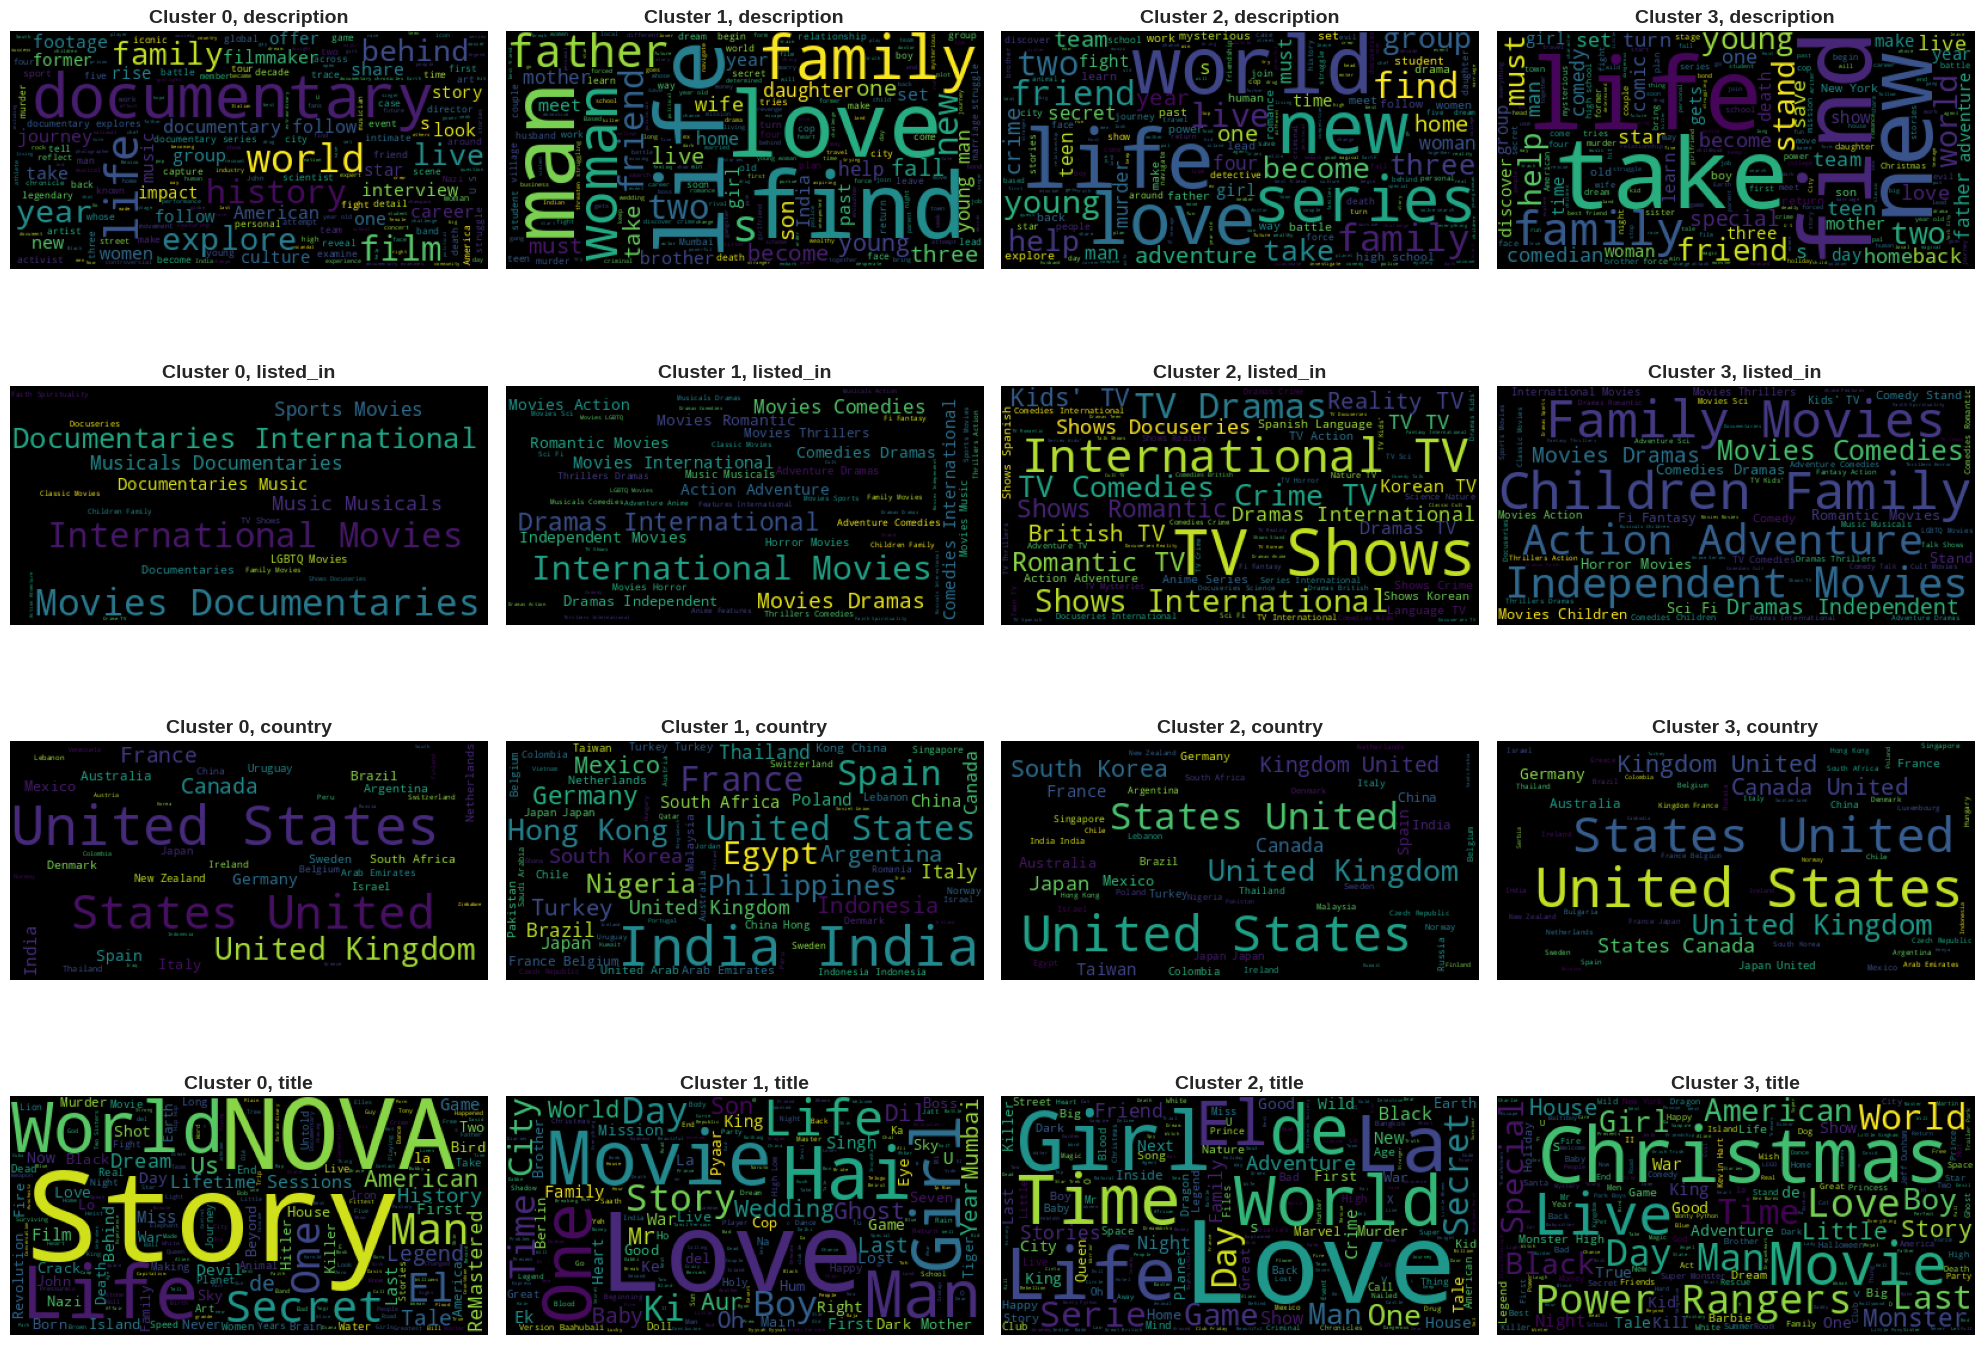

In [86]:
# Implementing the above defined function and plotting the wordcloud of each attribute
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(20, 15))
for i in range(4):
    for j, col in enumerate(['description', 'listed_in', 'country', 'title']):
        axs[j][i].imshow(kmeans_wordcloud(i, col))
        axs[j][i].axis('off')
        axs[j][i].set_title(f'Cluster {i}, {col}',fontsize=14, fontweight='bold')    
plt.tight_layout()
plt.show()

### ML Model - 2 Hierarchial Clustering

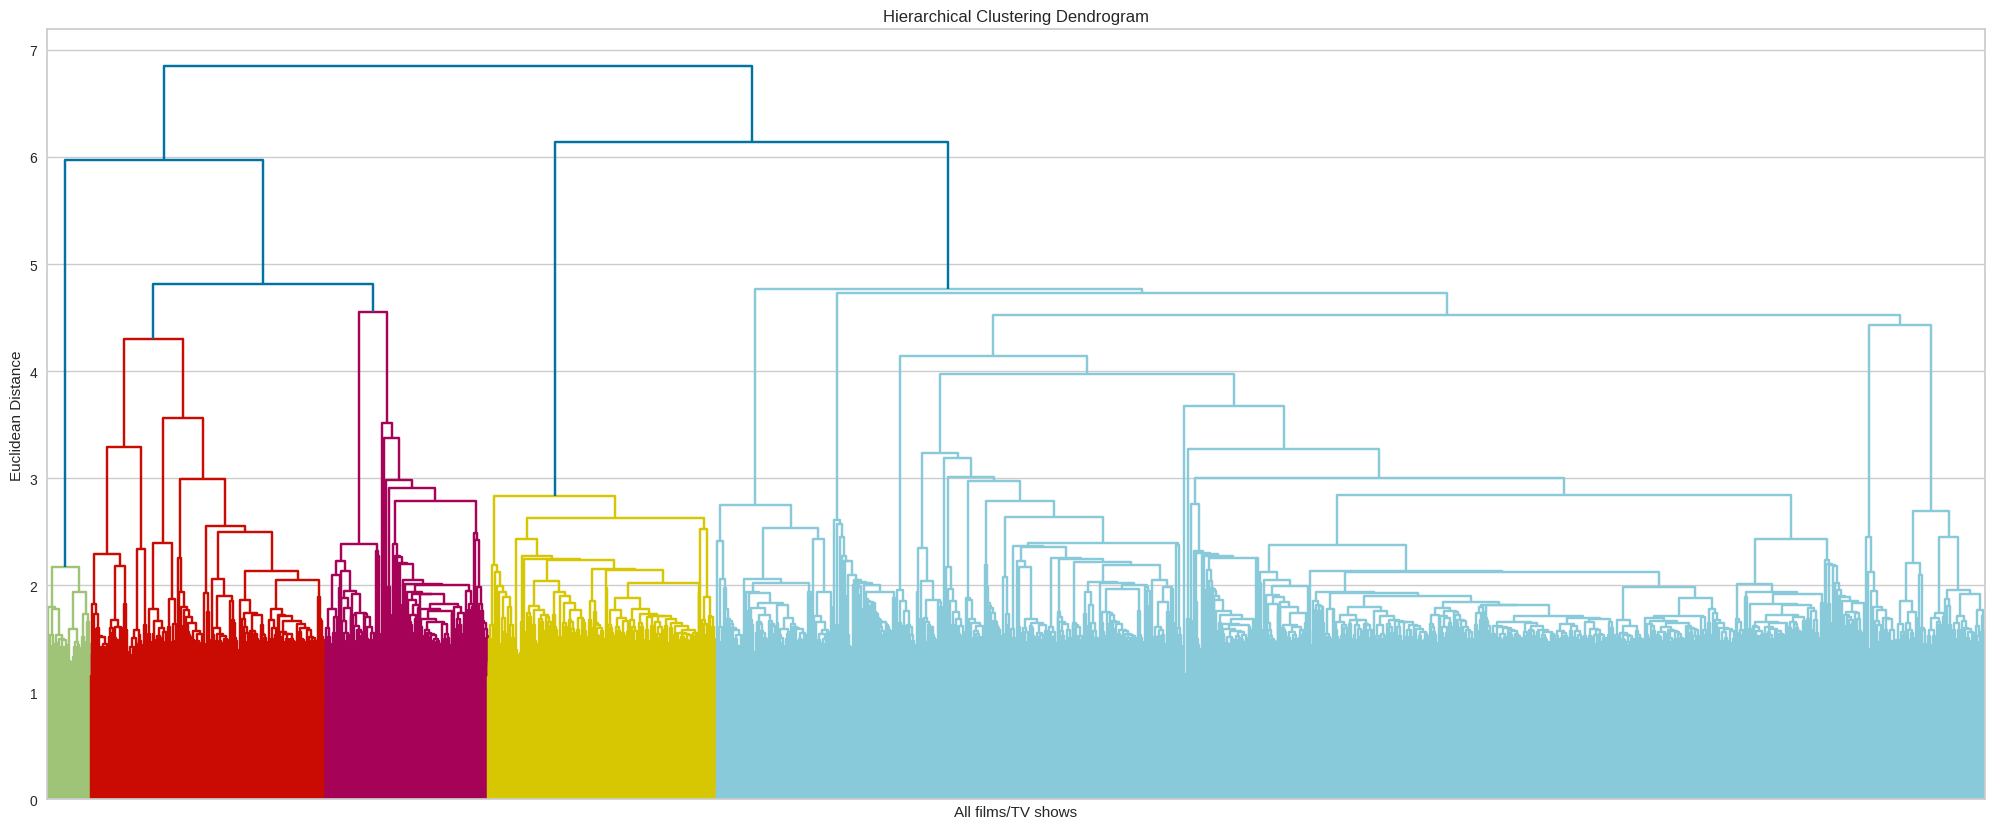

In [87]:
#importing needed libraries
from scipy.cluster.hierarchy import linkage, dendrogram

# HIERARCHICAL CLUSTERING
distances_linkage = linkage(tfidf_matrix_transformed, method = 'ward', metric = 'euclidean')
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('All films/TV shows')
plt.ylabel('Euclidean Distance')

dendrogram(distances_linkage, no_labels = True)
plt.show()

From the above Dendogram we can say that optimal value of clusters is 2. But before assigning the values to respective clusters, let's check the Sillhouette scores using Agglomerative clustering and follow the bottom up approach to aggregate the datapoints.

In [88]:
## Computing Silhouette score for each k
# Importing needed libraries
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Range selected from dendrogram above
k_range = range(2, 6)
for k in k_range:
    model = AgglomerativeClustering(n_clusters=k)
    labels = model.fit_predict(tfidf_matrix_transformed)
    score = silhouette_score(tfidf_matrix_transformed, labels)
    print("k=%d, Silhouette score=%f" % (k, score))

k=2, Silhouette score=0.001116
k=3, Silhouette score=0.002054
k=4, Silhouette score=0.000800
k=5, Silhouette score=0.000781


From the above silhouette scores it is clear that the **3 clusters** are optimal value (maximum Silhouette score), which is also clear from the above Dendogram that for 2 cluters the euclidean distances are maximum.

#### Creating 2D curve for Clustered Data

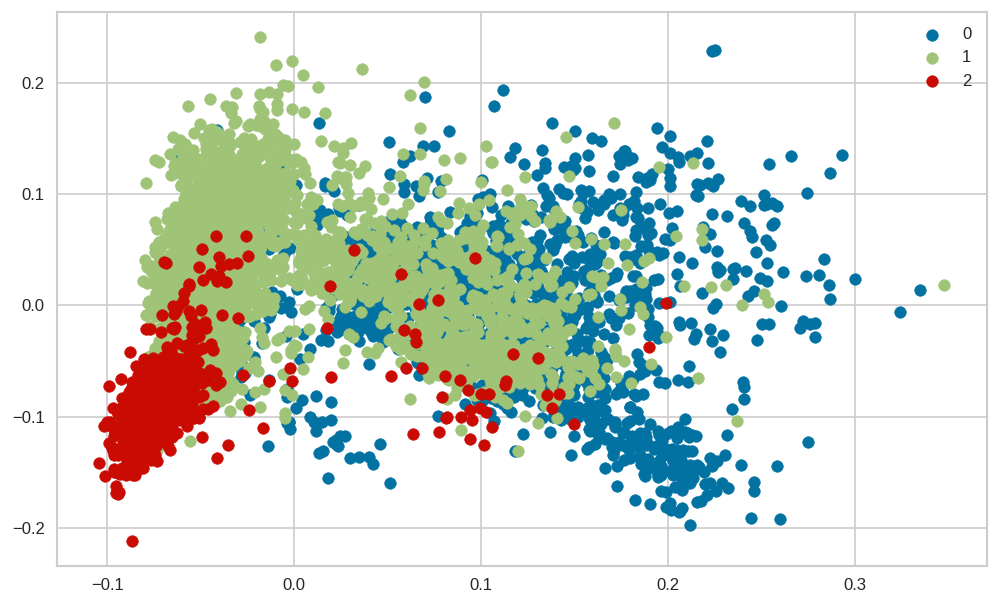

In [89]:
#training the K-means model on a dataset  
Agmodel = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward') 

#predict the labels of clusters.
plt.figure(figsize=(10,6), dpi=120)
label = Agmodel.fit_predict(tfidf_matrix_transformed)
#Getting unique labels
unique_labels = np.unique(label)
 
#plotting the results:
for i in unique_labels:
    plt.scatter(tfidf_matrix_transformed[label == i , 0] , tfidf_matrix_transformed[label == i , 1] , label = i )
plt.legend()
plt.show()


#### Creating 3D curve for Clustered Data

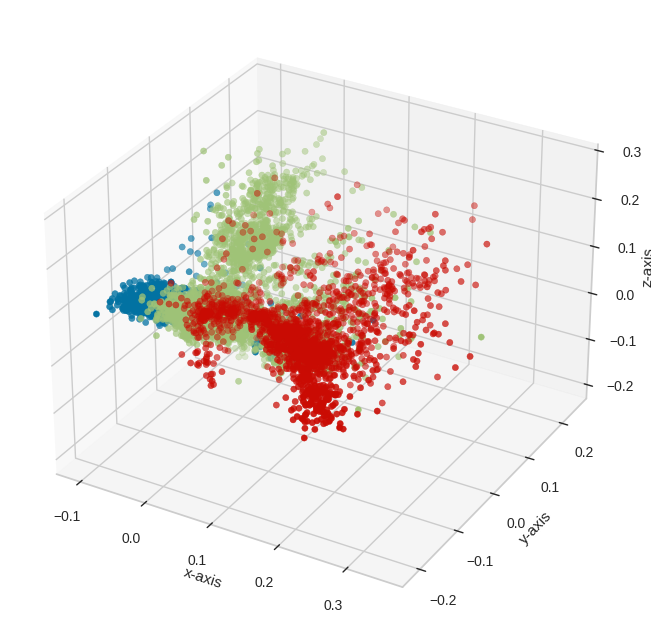

In [90]:
# Importing library to visualize clusters in 3D
from mpl_toolkits.mplot3d import Axes3D

# Plot the clusters in 3D
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111, projection='3d')
colors = ['r', 'g', 'b', 'y']
for i in range(len(colors)):
    ax.scatter(tfidf_matrix_transformed[Agmodel.labels_ == i, 0], tfidf_matrix_transformed[Agmodel.labels_ == i, 1], tfidf_matrix_transformed[Agmodel.labels_ == i, 2],c=colors[i])
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
plt.show()

In [91]:
# Add cluster values to the dateframe.
df_copy['agglomerative_cluster'] = Agmodel.labels_

#### 1. Explain the ML Model used and it's performance.

In [92]:
def agglomerative_wordcloud(cluster_number, column_name):
  '''function for Building a wordcloud for the movie/shows'''

  #Importing libraries
  from wordcloud import WordCloud, STOPWORDS

  # Filter the data by the specified cluster number and column name
  df_wordcloud = df_copy[['agglomerative_cluster', column_name]].dropna()
  df_wordcloud = df_wordcloud[df_wordcloud['agglomerative_cluster'] == cluster_number]
  
  # Combine all text documents into a single string
  text = " ".join(word for word in df_wordcloud[column_name])
  
  # Create the word cloud
  wordcloud = WordCloud(stopwords=set(STOPWORDS), background_color="black").generate(text)
  
  # Return the word cloud object
  return wordcloud

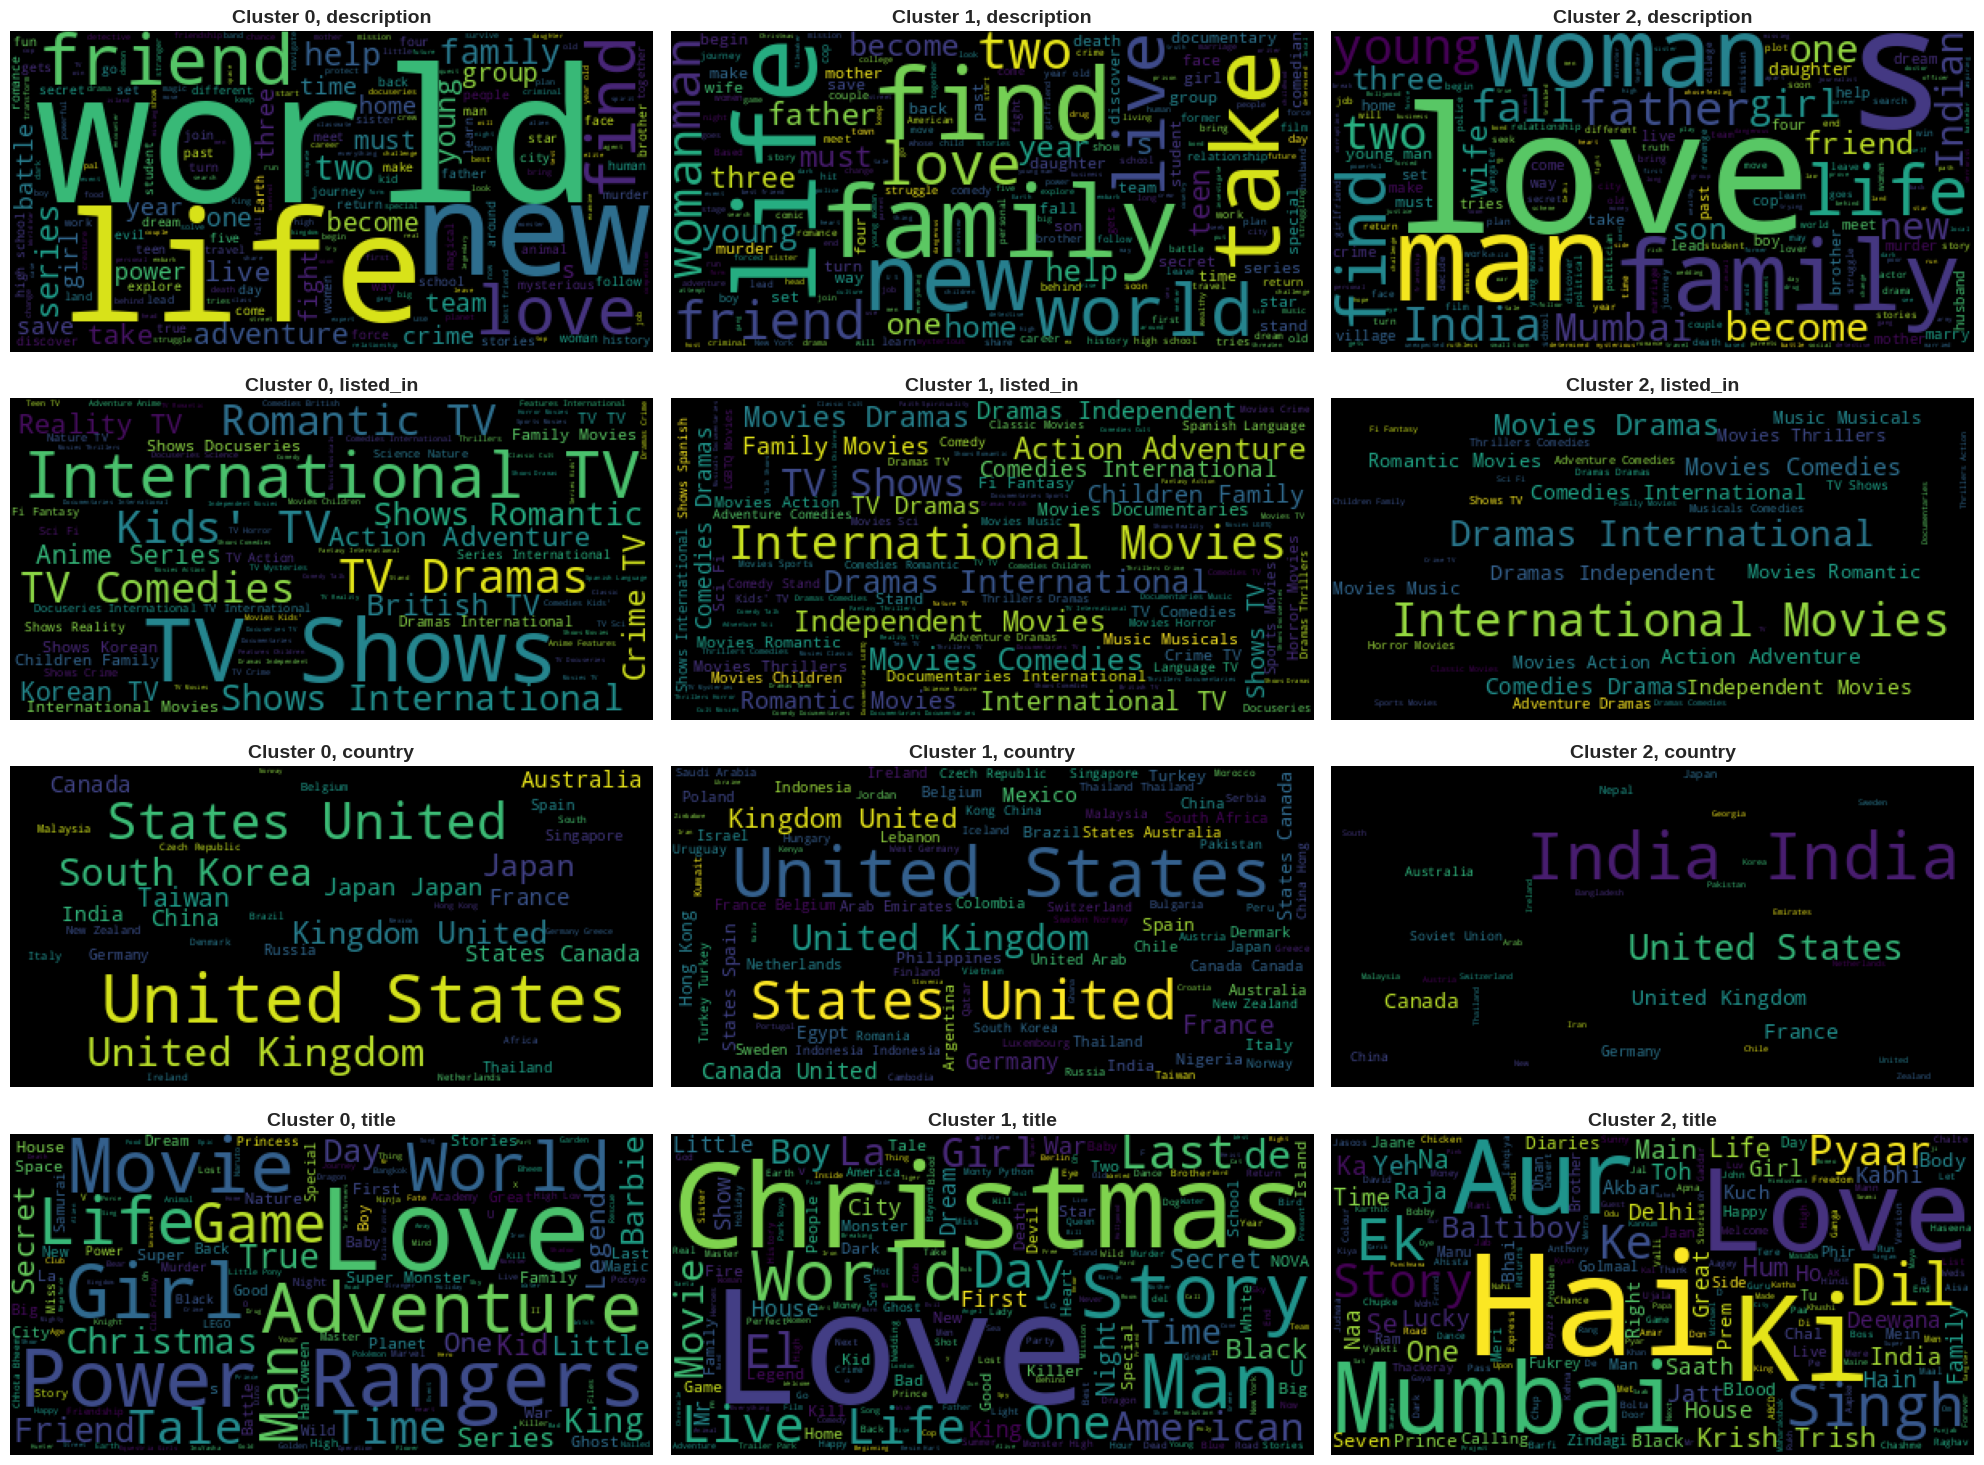

In [93]:
# Implementing the above defined function and plotting the wordcloud of each attribute
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(20, 15))
for i in range(3):
    for j, col in enumerate(['description', 'listed_in', 'country', 'title']):
        axs[j][i].imshow(agglomerative_wordcloud(i, col))
        axs[j][i].axis('off')
        axs[j][i].set_title(f'Cluster {i}, {col}',fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### ML Model - 3 DBSCAN

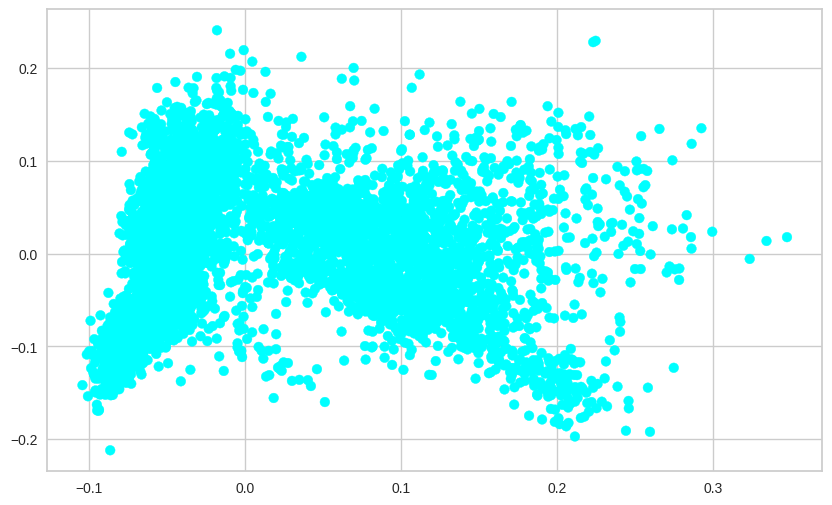

In [94]:
# ML Model - 3 Implementation
from sklearn.cluster import DBSCAN
from sklearn import metrics
# Fit and Predict the algorithm
y_pred = DBSCAN(eps=0.5, min_samples=20).fit_predict(tfidf_matrix_transformed)
plt.figure(figsize=(10,6))
plt.scatter(tfidf_matrix_transformed[:,0], tfidf_matrix_transformed[:,1], c=y_pred, cmap='cool')

### ML Model - 4 Building a Recommendation System

The Cosine similarity is used for recommendation system .It is a measure of similarity between two non-zero vectors in a multidimensional space. It measures the cosine of the angle between the two vectors, which ranges from -1 (opposite direction) to 1 (same direction), with 0 indicating orthogonality (the vectors are perpendicular to each other).

In this project we have used cosine similarity which is used to determine how similar two documents or pieces of text are. We represent the documents as vectors in a high-dimensional space, where each dimension represents a word or term in the corpus. We can then calculate the cosine similarity between the vectors to determine how similar the documents are based on their word usage.

We'll are using cosine similarity over tf-idf because:

* Cosine similarity handles high dimensional sparse data better.

* Cosine similarity captures the meaning of the text better than tf-idf. For example, if two items contain similar words but in different orders, cosine similarity would still consider them similar, while tf-idf may not. This is because tf-idf only considers the frequency of words in a document and not their order or meaning.

In [95]:
# Importing neede libraries
from sklearn.metrics.pairwise import cosine_similarity

# Create a TF-IDF vectorizer object and transform the text data
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(cluster_df['cluster_data'])

# Compute cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix)

def recommend_content(title, cosine_sim=cosine_sim, data=df_copy):
    # Get the index of the input title in the programme_list
    programme_list = data['title'].to_list()
    index = programme_list.index(title)

    # Create a list of tuples containing the similarity score and index 
    # between the input title and all other programmes in the dataset
    sim_scores = list(enumerate(cosine_sim[index]))

    # Sort the list of tuples by similarity score in descending order
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:11]

    # Get the recommended movie titles and their similarity scores
    recommend_index = [i[0] for i in sim_scores]
    rec_movie = data['title'].iloc[recommend_index]
    rec_score = [round(i[1], 4) for i in sim_scores]

    # Create a pandas DataFrame to display the recommendations
    rec_table = pd.DataFrame(list(zip(rec_movie, rec_score)), columns=['Recommendation', 'Similarity_score(0-1)'])

    return rec_table

In [96]:
# Testing the movie
recommend_content('Don 2')

Recommendation  Similarity_score(0-1)
0                                                Don                 0.3567
1                                           No Entry                 0.2322
2  My Next Guest with David Letterman and Shah Ru...                 0.2309
3                                     Happy New Year                 0.2271
4                                              Billu                 0.2176
5                                       Main Hoon Na                 0.2140
6                                    Dil Dhadakne Do                 0.2127
7                               Kabhi Haan Kabhi Naa                 0.2030
8                                     Luck by Chance                 0.1964
9                                     Dil Chahta Hai                 0.1953

In [97]:
# Testing the movie
recommend_content('Happy New Year')

Recommendation  Similarity_score(0-1)
0                                       Om Shanti Om                 0.2504
1                                       Main Hoon Na                 0.2442
2                                              Don 2                 0.2271
3  My Next Guest with David Letterman and Shah Ru...                 0.2217
4                                                Don                 0.1980
5                                    Chennai Express                 0.1936
6                               Kabhi Haan Kabhi Naa                 0.1879
7                             Kabhi Alvida Naa Kehna                 0.1805
8                                            Chaahat                 0.1718
9                                       7 Khoon Maaf                 0.1496

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

We have chosen **Silhoutte Score** over **Distortion Score** (also known as inertia or sum of squared distances) as evaluation metrics as it measures how well each data point in a cluster is separated from other clusters. It ranges from **-1 to 1**, with higher values indicating better cluster separation. A silhouette score close to 1 indicates that the data point is well-matched to its own cluster and poorly matched to neighboring clusters. A score close to 0 indicates that the data point is on or very close to the boundary between two clusters. A score close to -1 indicates that the data point is probably assigned to the wrong cluster.

The advantages of using silhouette score over distortion score are:

Silhouette score takes into account both the cohesion (how well data points within a cluster are similar) and separation (how well data points in different clusters are dissimilar) of the clusters, whereas distortion score only considers the compactness of each cluster.
Silhouette score is less sensitive to the shape of the clusters, while distortion score tends to favor spherical clusters, and in our case the clusters are not completely spherical.
Silhouette score provides more intuitive and interpretable results, as it assigns a score to each data point rather than just a single value for the entire clustering solution.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

 **K-means** is the choosen clustering model , primarily due to the relatively **high Silhouette Score** that we obtained through this algorithm. Additionally, we have observed that the resulting clusters are well-separated from one another in the 3 dimensions. Therefore, we believe that K-means is the most appropriate choice for clustering our data and obtaining meaningful insights from it.K-means performs better than alternative clustering techniques in specific circumstances.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [98]:
# Save the File
# Importing pickle module
import pickle

In [99]:
# Save the File
# Save the File
with open('recommend.pkl', 'wb') as f:
    pickle.dump(recommend_content, f)

with open('tfidf.pkl', 'wb') as f:
    pickle.dump(tfidf, f)
     
with open('tfidf_matrix.pkl', 'wb') as f:
    pickle.dump(tfidf_matrix, f)

# Saving the dataframe in dictionary format
with open('content_dict.pkl', 'wb') as f:
    pickle.dump(df_copy.to_dict(), f)

#cosine_sim
with open('cosine_similarity.pkl', 'wb') as f:
    pickle.dump(cosine_sim, f)

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

**From EDA**


*   Netflix contains 69% movies and 31% TV shows.Top 10 trending directors of movies and TV shows have been identified. The adding of movies and TV shows are more in 10th and 12th months and very low in 2nd month.

*   Top 10 actors in movies and TV shows have been identified. USA and India are in top two places for launching the movies. Documentary type movies and Kids TV shows are more. USA and India are the top 2 countries for creating new contents. 
*  Adult content movies and TV shows have the more ratings.Family and friends contents less ratings. Most of the movies and Tv shows added in first day of the month and middle of the months. The movies and TV shows released on 2018 and 2019 are more. Older movies are not available more.  
*  Netflix have more movies and TV shows on Adult content and less on Family-Friendly content. More movies and TV shows from USA and more movies and less TV shows from india.Most of the movie duration are between 80 to 120 minutes.The most of the TV shows are in season 1.
*   It was found that most of the countries produces content related to Adult and Teen. Most adult contents produced by Spain, Maxico and France. Egypt, India produces most of the Teen content. Canada produces Children and Family content in better ratio in compaired with other countries, along with Adult and teen content. India has less Adult content with respect to other top countries. Teen and Adult contents duration are more Family-Friend content duration are less.

**From ML Model**



*   The following models were implemented for clustering such as K-means clustering, Agglomerative Hierarchical Clustering, DBSCAN (Density-Based Spatial Clustering of Applications with Noise) and Recommendation System.

*   The optimal number of clusters got from K-means is 4 and from Agglomerative Hierarchical Clustering the optimal number of clusters are found out to be 3.
*   The silhouette Score was choosen used the  evaluation metric over distortion score because it provides a more intuitive and interpretable result. Also Silhouette score is less sensitive to the shape of the clusters.
*   DBSCAN algorithm is not able to differentiate clusters and hence not helped in Project.
*   Built a Recommendation system that can help Netflix improve user experience and reduce subscriber churn by providing personalized recommendations to users based on their similarity scores.






















### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***